# <center>Colorado K-12 Financial Transparency – <br>An Exploratory Data Science Comparison Across Schools</center>

### <center>MSDS 696: Data Science Practicum II - Stacey Sandy</center>

### <u><b>Overview </b></u>
This project is for the fulfillment of my final course in the pursuit of my Master of Science in Data Science degree at Regis University. In this past academic year, my kindergartner son has brought home 5 different fundraisers and a quarterly scholastic book fair flyer. I understand the scholastic book fair awards books to classes that purchase the most books. Unfortunately, I am unclear where the multiple fundraiser funding is going, what the funding is for, and how fundraisers feed into the school. These implications on the school and district fundraiser efforts need further analysis. Especially since school ends in a little over two months, I am curious to learn how expenses are handled. I intend to compare expenses across schools and then across districts. I would like to analyze which schools are spending more than others and why their expenses are more or less than others. I want to learn the cause and effects as to what are the trends on expenditures. Hopefully, I could learn more about why fundraising is important or necessary multiple times a year for any school. 

### <u><b>Objective</b></u>
The objective of this project and the primary research question is to address how financial expenditures are being spent across K through 12 schools in Colorado. An exploratory data science approach will be conducted to answer this research question. Overall, what are the school expenses that impact our children’s educational needs? Could the type of staffing, teacher types, and number of students be an impact? What are the contributing factors of the various expenses? How do schools and districts compare to one another? What variables are impacting the data reported? Could federal and state funding not be enough? 

### <u><b>Data Source</b></u>
* Colorado Department of Education website on Colorado’s K12 Financial Transparency website: https://coloradok12financialtransparency.com/#/
* The complete dataset of all Colorado K12 districts and BOCES can also be downloaded at: https://s3.amazonaws.com/bb-pub-pipeline-production/home/circleci/repo/public/uploads/data_files/uploads/000/000/416/20200114030354-colorado-financial-public-data-pipeline-v-1-Run_1-export-source-lep-facts.csv20200114-2678-rqjqmn.csv?1578999834

### <u><b>Financial Policies and Procedures Documentation</b></u>
* Colorado Department of Education. (2016, July 1). <i>Financial Policies and Procedures Chart of Accounts.</i> Retrieved from https://www.cde.state.co.us/cdefinance/fpp_coa1617

### <u><b>Things to take into consideration about the data:</b></u>
1. Data collected is for the Fiscal Year 2017-2018
    * Fiscal Year - a twelve-month accounting period (July 1 through June 30) to which the annual budget applies.
    * In this case, data is from July 1, 2017 through June 30, 2018


2. However, the financial data posted follows the standard <i>Financial Policies and Procedures Chart of Accounts</i> for the previous fiscal year 2016-2017.
<br>
This means the Financial Policies and Procedures Chart of Accounts for Fiscal Year 2017-2018, 2018-2019, and 2019-2020 may not coincide with the given data set provided from the Colorado K12 Financial Transparency website. This can be due to the fact that we are still in the current 2019-2020 Fiscal Year. Although, it is not mentioned or mad clear as to why the 2017-2018 Financial Policies and Procedures Chart of Accounts is not used from the archive. 
<br>

<div class="alert alert-block alert-success">
<b>This project will examine codes that will only refer to those codes applicable and found within the <u>2016-2017 Financial Policies and Procedures Chart of Accounts</u> as advised from the <u>Colorado K12 Financial Transparency</u> website FAQ. Should other information deem necessary, further research and examiniation may be conducted.</b>
<br>
<br>
Resources<br>
Colorado Department of Education. (2019, June 13). <i>Chart of Accounts: Archive.</i> Copyright © 1999-2020 Colorado Department of Education. Retrieved from http://www.cde.state.co.us/cdefinance/sfcoa_archive
<br>
<br>
The excel document to match the data to the financial codes will be using of the "Chart_of_Account_1617.xlsx" document.
<br>
<br>
The above resources can be found within the data folder in my GitHUb Project Repository.
</div>

#### The following website is available for direct school or district searchs within Colorado:
* Colorado K12 Financial Transparency website: https://coloradok12financialtransparency.com/#/

### Project Process:
1. Conduct exploratory data analysis (EDA) on complete dataset of all Colorado K12 Financial Transparency data set.<br>
2. Investigate unique Ids, values, and row/column data.<br>
3. Exclude columns as suggested from the Chart of Accounts and csv data set.
3. Highlight financial codes of interest that are most used and least used.<br>
4. Add additional data from Colorado Department of Education on Financial Policies and Procedures Chart of Accounts.<br>
5. Conduct other EDA as deem necessary.<br>
6. Conduct pre-liminary visualizations and refine visualizations as necessary.<br> 
7. In final, compare and contrast findings. Answer research questions. Did you accomplish what your project objective detailed?

## <center>Exploratory Data Analysis (EDA) on all Colorado K12 districts and BOCES</center>

In [1]:
# Load libraries
import pandas as pd
from pandas_summary import DataFrameSummary
import numpy as np
from pandas_profiling import ProfileReport

In [2]:
# Load the CO K12 dataset into a dataframe.
COK12_df = pd.read_csv('Data/colorado-financial-public-data-pipeline-v-1-Run#1-export-source-lep-facts.csv', header=4)

In [3]:
# Ensure columns were retrieved
COK12_df.columns

Index(['district_code', 'admin_unit', 'school_code', 'fund_code',
       'location_code', 'sre_code', 'program_code', 'object_source_code',
       'job_class_code', 'grant_code', 'amount_cents', 'exclude_school',
       'exclude_district'],
      dtype='object')

In [4]:
# Look at dataset head
COK12_df.head()

,district_code,admin_unit,school_code,fund_code,location_code,sre_code,program_code,object_source_code,job_class_code,grant_code,amount_cents,exclude_school,exclude_district
0,3080,64203,0,10,600,0,20,100,200,0,71250.0,f,f
1,3080,64203,0,10,600,0,10,100,200,4010,13841274.0,f,f
2,3080,64203,0,10,700,0,2700,100,100,0,12171639.0,f,f
3,3080,64203,0,21,700,0,3100,100,100,0,4079700.0,f,f
4,3080,64203,4854,10,200,0,1700,100,400,3130,8660925.0,f,f


In [5]:
# Look at dataset tail
COK12_df.tail()

,district_code,admin_unit,school_code,fund_code,location_code,sre_code,program_code,object_source_code,job_class_code,grant_code,amount_cents,exclude_school,exclude_district
280681,1180,64233,570,10,300,0,1800,810,0,0,340700.0,f,f
280682,1180,64233,429,11,951,0,2500,810,0,0,-700.0,f,f
280683,1180,64233,429,11,951,0,2600,810,0,0,45477.0,f,f
280684,1180,64233,429,11,951,0,2800,810,0,0,24500.0,f,f
280685,1180,64233,429,11,951,0,18,810,0,0,2499.0,f,f


In [6]:
# View dataframe shape (# of Rows and # of Columns)
COK12_df.shape

(280686, 13)

In [7]:
# Look at dataset information details
COK12_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280686 entries, 0 to 280685
Data columns (total 13 columns):
district_code         280686 non-null int64
admin_unit            280686 non-null int64
school_code           280686 non-null int64
fund_code             280686 non-null int64
location_code         280686 non-null int64
sre_code              280686 non-null int64
program_code          280686 non-null int64
object_source_code    280686 non-null int64
job_class_code        280686 non-null int64
grant_code            280686 non-null int64
amount_cents          280686 non-null float64
exclude_school        280686 non-null object
exclude_district      280686 non-null object
dtypes: float64(1), int64(10), object(2)
memory usage: 27.8+ MB


### Note, the columns with dtypes int64 are numbers, but....
All the numbers within each column are numerical values that are tied to unique identifiers within the Chart of Accounts. Except for the column <b>amount_cents</b>.

For example: school code 100 indicates elemetary schools. Therefore, it would never make sense to add these numerical values or numbers together within each column.

In [8]:
#Let's confirm a count on null values in the entire data set.
print(np.count_nonzero(COK12_df.isnull()))

0


In [9]:
# Look at the data frame summary data
COK12_dfs = DataFrameSummary(COK12_df)

In [10]:
# Look at the column stats within the Data Frame Summary
COK12_dfs.columns_stats

,district_code,admin_unit,school_code,fund_code,location_code,sre_code,program_code,object_source_code,job_class_code,grant_code,amount_cents,exclude_school,exclude_district
counts,280686,280686,280686,280686,280686,280686,280686,280686,280686,280686,280686,280686,280686
uniques,200,62,1920,34,258,45,317,415,94,228,222337,2,2
missing,0,0,0,0,0,0,0,0,0,0,0,0,0
missing_perc,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%
types,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,bool,bool


#### Let's try to get an image of the Data Frame Summary column stats table above for comparison and contrast purposes.

In [11]:
# Courtesy of Blane (2017) on converting a dataframe to image (see references for further insight)
# Import required libraries
import random
import imgkit
import pandas
import os

In [12]:
## Enter your css for the table.
css = """
<style type=\"text/css\">
table {
color: #333;
font-family: Helvetica, Arial, sans-serif;
width: 640px;
border-collapse:
collapse; 
border-spacing: 0;
}

td, th {
border: 1px solid transparent; /* No more visible border */
height: 30px;
}

th {
background: #DFDFDF; /* Darken header a bit */
font-weight: bold;
}

td {
background: #FAFAFA;
text-align: center;
}

table tr:nth-child(odd) td{
background-color: white;
}
</style>
"""

In [13]:
# Function to convert dataframe to image
def DataFrame_to_image(data, css, outputfile="out.png", format="png"):
    '''
    For rendering a Pandas DataFrame as an image.
    data: a pandas DataFrame
    css: a string containing rules for styling the output table. This must 
         contain both the opening an closing <style> tags.
    *outputimage: filename for saving of generated image
    *format: output format, as supported by IMGKit. Default is "png"
    '''
    fn = str(random.random()*100000000).split(".")[0] + ".html"
    
    try:
        os.remove(fn)
    except:
        None
    text_file = open(fn, "a")
    
    # write the CSS
    text_file.write(css)
    # write the HTML-ized Pandas DataFrame
    text_file.write(data.to_html())
    text_file.close()
    
    # See IMGKit options for full configuration,
    # e.g. cropping of final image
    imgkitoptions = {"format": format}
    
    imgkit.from_file(fn, outputfile, options=imgkitoptions)
    os.remove(fn)

In [14]:
# Try to suppress a deprecation warning...
import warnings
warnings.filterwarnings('ignore')

In [15]:
# Convert the DataFrame Summary to image output
DataFrame_to_image(COK12_dfs.columns_stats, css)

Loading page (1/2)
Rendering (2/2)                                                    
Done                                                               


### That worked beautifully after several days of troubleshooting.... 
![COK12_dfs](Images/DFSout.png)

We will have to refine that image when we have a better refined dataframe.

In [16]:
# Let's make a copy of the dataframe.
COK12_df2 = COK12_df.copy()

### Remember we must take note of the following information provided within the dataset (csv file)

When summarizing this information there are three important points to keep in mind:<br>
1) Fund 90 is used for informational purposes only and must be excluded from any analysis.<br>
2) All amounts are displayed with cents and without decimal places. E.g. the value $5.42 will be recorded as 542. <br>
3) The data methodology page contains details on the categories excluded from this summary at both the District and the School level.

In [17]:
# Drop the exclude_school and exclude_district columns from data frame
COK12_df2 = COK12_df2.drop(['exclude_school', 'exclude_district'],axis=1)

In [18]:
# Check columns again
COK12_df2.columns

Index(['district_code', 'admin_unit', 'school_code', 'fund_code',
       'location_code', 'sre_code', 'program_code', 'object_source_code',
       'job_class_code', 'grant_code', 'amount_cents'],
      dtype='object')

In [19]:
# Look at data frame head
COK12_df2.head()

,district_code,admin_unit,school_code,fund_code,location_code,sre_code,program_code,object_source_code,job_class_code,grant_code,amount_cents
0,3080,64203,0,10,600,0,20,100,200,0,71250.0
1,3080,64203,0,10,600,0,10,100,200,4010,13841274.0
2,3080,64203,0,10,700,0,2700,100,100,0,12171639.0
3,3080,64203,0,21,700,0,3100,100,100,0,4079700.0
4,3080,64203,4854,10,200,0,1700,100,400,3130,8660925.0


### Note the trailing decimal and zero (.0) for the numbers in the amount_cents column. The amount_cents column is a float64 type as the df.info() details above.

REMEMBER FROM ABOVE: When summarizing this information there are three important points to keep in mind:<br>
2) All amounts are displayed with cents and without decimal places. E.g. the value $5.42 will be recorded as 542. <br>

For the moment being, we will leave the column values as intergers for visualization purposes and move them to categorical values when it is time to conduct the machine learning algorithm.

In [20]:
# Change ammount_cents to int64 not float64 to drop the trailing '.0'
COK12_df2 = COK12_df2.astype({'amount_cents':'int64'})

In [21]:
# Confirm data types
COK12_df2.dtypes

district_code         int64
admin_unit            int64
school_code           int64
fund_code             int64
location_code         int64
sre_code              int64
program_code          int64
object_source_code    int64
job_class_code        int64
grant_code            int64
amount_cents          int64
dtype: object

In [22]:
# Look at tail and ensure amount_cents is no longer showing as a float type with the trailing '.0'
COK12_df2.tail()

,district_code,admin_unit,school_code,fund_code,location_code,sre_code,program_code,object_source_code,job_class_code,grant_code,amount_cents
280681,1180,64233,570,10,300,0,1800,810,0,0,340700
280682,1180,64233,429,11,951,0,2500,810,0,0,-700
280683,1180,64233,429,11,951,0,2600,810,0,0,45477
280684,1180,64233,429,11,951,0,2800,810,0,0,24500
280685,1180,64233,429,11,951,0,18,810,0,0,2499


### Again, we must take note of the following information provided within the dataset (csv file)

REMEMBER FROM ABOVE: When summarizing this information there are three important points to keep in mind:<br>

1) <b>Fund 90</b> is used for informational purposes only and must be excluded from any analysis.<br>

In [23]:
# Let's delete every row that has fund 90 in the fund_code column to exclude fund 90
# First obtain all rows/indexs in fund_code that has the value 90
indexValues = COK12_df2[COK12_df2['fund_code'] == 90].index

# Delete The row indexes from the dataframe
COK12_df2.drop(indexValues, inplace=True)

In [24]:
# Look at describe and compare to Data Frame Summary Statistics code we previously ran
COK12_describe = COK12_df2.describe()

In [25]:
# Show describe statistics
COK12_describe

,district_code,admin_unit,school_code,fund_code,location_code,sre_code,program_code,object_source_code,job_class_code,grant_code,amount_cents
count,279115.000000,279115.000000,279115.000000,279115.000000,279115.000000,279115.000000,279115.000000,279115.000000,279115.000000,279115.000000,2.791150e+05
mean,1369.384021,29321.412561,3559.578002,16.323103,348.101474,2.288161,1423.304896,1148.270577,113.961177,1074.665966,1.530466e+07
std,1505.351356,23340.939078,3196.457374,12.182647,294.391021,12.544473,1182.317720,1961.738421,168.339422,1921.915812,5.917463e+08
min,10.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.614800e+11
25%,480.000000,7020.000000,24.000000,10.000000,100.000000,0.000000,30.000000,200.000000,0.000000,0.000000,6.597000e+04
50%,990.000000,21060.000000,2954.000000,10.000000,300.000000,0.000000,1700.000000,513.000000,0.000000,0.000000,6.187780e+05
75%,1550.000000,51010.000000,6365.000000,21.000000,600.000000,0.000000,2400.000000,735.000000,200.000000,3130.000000,3.387589e+06
max,9175.000000,80010.000000,9809.000000,85.000000,999.000000,95.000000,9330.000000,9999.000000,636.000000,9557.000000,1.633140e+11


In [26]:
# Let's try to get an image of the describe dataframe for comparison purposes to the DataFrameSummary above
# Attempt to convert the dESCRIBE to image output
DataFrame_to_image(COK12_describe, css)

Loading page (1/2)
Rendering (2/2)                                                    
Done                                                               


### Not bad for comparitive purposes.... 
![COK12_describe](Images/Describeout.png)

We will refine this image better as we refine the dataframe columns and dataset better.

### Investigate the top 5 used district_code Codes
<br>
DEFINITION:
<br>
"<b>District Code</b> – a unique identifier tied to each reporting entity" (CDE, <i>FY16-17 Chart of Accounts</i>, p. 5).
<br>
<br>
REMEMBER:
<br>
"ONE METHOD for BOCES to track transactions by district being served is to define location codes such that each district has its own two-digit code.  Then these two-digit district codes may be combined with the appropriate first digit to create a location code that follows the structure from the chart of accounts" (CDE, <i>FY16-17 Chart of Accounts</i>, p. 208).

In [27]:
# Let's see the top 5 used district_code values:
COK12_districtCodes = pd.value_counts(COK12_df2['district_code'].values,sort=True)
COK12_districtCodes.head()

880     34928
1420    21123
900     15173
20      11183
1550    10620
dtype: int64

<div class="alert alert-block alert-info">
    <b>Detail breakdown of the top 5 used District Codes:</b>
<br>
880: DENVER COUNTY 1
<br>
1420: JEFFERSON COUNTY R-1
<br>
900: DOUGLAS COUNTY RE 1
<br>
20: ADAMS 12 FIVE STAR SCHOOLS
<br>
1150: FREMONT RE-2
</div>

#### Let's look at the 5 least used District Codes

In [28]:
# Look at tail of district codes
COK12_districtCodes.tail()

9140    71
9165    56
8042    42
8041    28
9120    22
dtype: int64

#### Of the least used District Codes shown below, the fewest used are as follows:

9140: MT EVANS BOCES
<br>
9165: UTE PASS BOCES
<br>
8041: <b>Not found within the Chart of Accounts fiscal year 2016-2017.</b>
<br>
9120: ADAMS COUNTY BOCES

### Investigate the top 5 used admin_unit Codes
<br>
DEFINITION:
<br>
"<b>Administrative Unit</b> – a unique identifier used to identify the specific administrative unit that the reporting unit is tied to" (CDE, <i>FY16-17 Chart of Accounts</i>, p. 5).

REMEMBER:
<br>
"An Administrative Unit (AU) is a school district, board of cooperative services, or a combination of school districts or boards of cooperative services, which is approved by CDE and normally provides educational services to exceptional children.  AU’s function similarly to BOCES.  Thus, financial transactions between AU members and non-members are recorded using the same account codes and logic as financial transactions between BOCES members and non-members" (CDE, <i>FY16-17 Chart of Accounts</i>, p. 205).

In [29]:
# Let's see the top 5 used admin_unit code values:
COK12_adminUnits = pd.value_counts(COK12_df2['admin_unit'].values,sort=True)
COK12_adminUnits.head()

16010    35040
30011    21123
18010    15173
1020     11183
35010    10620
dtype: int64

<div class="alert alert-block alert-info">
<b>Detail breakdown of the top 5 used Administrative Unit Codes:</b>
<br>
16010: Denver 1, Denver
<br>
30011: Jefferson R-1, Lakewood
<br>
18010: Douglas Re 1, Castle Rock
<br>
1020: Adams 12, Northglenn-Thornton
<br>
35010: Larimer R-1, Poudre
</div>

#### The 5 least used Administrative Unit Codes shown below can <u>NOT</u> be found within the Chart of Account fiscal year 2016-2017.

In [30]:
# Look at admin units tail
COK12_adminUnits.tail()

19205    774
41010    668
62050    650
35030    615
49010    590
dtype: int64

### Investigate the top 5 used school_code Codes
<br>
DEFINITION:
<br>
"<b>School Code</b> – a unique identifier assigned for every school building at a school district for school site reporting" (CDE, <i>FY16-17 Chart of Accounts</i>, p. 5).

#### Investigate why the value <u>0</u> is the most commonly used school_code
NOTES on the use of the value <u>0</u>:
<br>
"Dimensions which are not required for a particular account type and are unused by the district, but are part of the basic account code structure, should be “zero filled" (CDE, <i>FY16-17 Chart of Accounts</i>, p. 7).

In [31]:
# Let's see the top 5 used school_code values:
COK12_schoolCodes = pd.value_counts(COK12_df2['school_code'].values,sort=True)
COK12_schoolCodes.head(6)

0       66878
24       1163
4516      771
20        695
1426      496
7500      489
dtype: int64

<div class="alert alert-block alert-info">
    <b>Detail breakdown of the top 5 used School Codes:</b>
<br>
24: ADAMS CITY HIGH SCHOOL
<br>
4516: KEARNEY MIDDLE SCHOOL
<br>
20: ADAMS CITY MIDDLE SCHOOL
<br>
1426: CENTRAL ELEMENTARY SCHOOL
<br>
7500: ROSE HILL ELEMENTARY SCHOOL
</div>

#### The 5 least used School Codes shown below can <u>NOT</u> be found within the Chart of Account fiscal year 2016-2017.

In [32]:
COK12_schoolCodes.tail()

2966    1
1455    1
4518    1
4520    1
6009    1
dtype: int64

### Investigate the top 5 used fund_code Codes
<br>
DEFINITION:
<br>
"<b>Fund</b> - an independent fiscal and accounting entity with a self-balancing set of accounts for recording cash and other financial resources.  It contains all related assets, liabilities and residual equities or balances, or changes therein.  Funds are established to carry on specific activities or attain certain objectives of the school district according to special legislation, regulations, or other restrictions" (CDE, <i>FY16-17 Chart of Accounts</i>, p. 6).

In [33]:
# Let's see the top 5 used fund_code values:
COK12_fundCodes = pd.value_counts(COK12_df2['fund_code'].values,sort=True)
COK12_fundCodes.head()

10    156838
22     31148
11     24780
21     19035
23     16804
dtype: int64

<div class="alert alert-block alert-info">
    <b>Detail breakdown of the top 5 used Fund Codes:</b>
<br>
10: General Fund
<br>
22: Governmental Designated-Purpose Grants Fund
<br>
11: Charter School Fund
<br>
21: Food Service Fund
<br>
23: Pupil Activity Special Revenue Fund
</div>

#### The 5 least used Fund Codes can <u>NOT</u> be found within the Chart of Account fiscal year 2016-2017.

In [34]:
# Look at fund codes tail
COK12_fundCodes.tail()

51    5
26    2
58    2
59    2
75    2
dtype: int64

### Investigate the top 5 used location_code Codes
<br>
DEFINITION:
<br>
"<b>Location</b> - a dimension used as a way to identify schools, attendance centers, operational units, buildings, or sites as budgetary units or cost center designators, as a means of segregating costs" (CDE, <i>FY16-17 Chart of Accounts</i>, p. 6).

NOTE:
<br>
"When compiling reports to reflect school district expenditures, the Colorado Department of Education (CDE) will use location codes in conjunction with program codes to report school district instructional programs by level.  However, the CDE will use program codes only--rather than program codes and location codes--to report school district support expenditures" (CDE, <i>FY16-17 Chart of Accounts</i>, p. 19).

In [35]:
# Let's see the top 5 used location_code values:
COK12_locationCodes = pd.value_counts(COK12_df2['location_code'].values,sort=True)
COK12_locationCodes.head(6)

100    79496
300    39963
600    35258
200    29514
0      21675
500    15242
dtype: int64

#### Investigate why the value <u>0</u> is amongst the top 5 most commonly used location_code codes

##### More NOTES on the use of the value <u>0</u> and notes specific to location_code:

"Note: Location codes 001 through 099 are available if needed for district use to identify elementary schools" (CDE, <i>FY16-17 Chart of Accounts</i>, p. 19).

"A unique and specific location code should be used for each on-line school or program within the District" (CDE, <i>FY16-17 Chart of Accounts</i>, p. 20).

"Note:  all on-line school and program location codes are bolded and on-line school and program detailed activities must be reported (reporting of single purchase service account for online is not allowable" (CDE, <i>FY16-17 Chart of Accounts</i>, p. 20).

"900-969  Location codes 900 through 969 are reserved for district use for charter schools only.<br>
900 – 919  Elementary Charter Schools.  Location codes 900 through 919 must be used for elementary charter schools.<br>
920 – 929 Middle School Charter Schools.  Must be used for middle school (junior high) charter schools.<br>
930 – 939 High School Charter Schools.  Must be used for high school charter schools.<br>
940 – 949 Vocational/Technical Charter Schools.  Must be used for vocational/technical charter schools.<br>
950 – 969  Combination Charter Schools.  Location codes 950 through 969 must be used for combination charter schools
970 Other Operational Units.<br>
Location codes 970 through 989 are available for district use for other operational units not specified elsewhere.<br>
990 Private/Parochial Schools.  Used to identify private or parochial schools.<br>
Location codes 990-999 are available for district use." (CDE, <i>FY16-17 Chart of Accounts</i>, p. 21).
<br>
<br>
<b>"In order to produce an apples-to-apples comparison, CDE will use location codes to aggregate instructional program data reported for elementary and middle schools regardless of whether these data are reported by subject or by a general education program such as 0070 Gifted and Talented or 0080 General Instructional Media" (CDE, <i>FY16-17 Chart of Accounts</i>, p. 28).</b>
<br>
<br>
"Charter school location codes MUST be used with ALL transactions relating to charter schools" (CDE, <i>FY16-17 Chart of Accounts</i>, p. 149).
<br>
<br>
<b>"HOW LOCATION CODES CAN BE USED BY THE BOCES 
<br>
CDE will use location codes numbered 100 through 599 in conjunction with instructional program codes to identify instructional costs by level (i.e., as elementary, middle/junior high school, or high school). Therefore, BOCES MUST use the structure for location codes that is defined in the chart of accounts" (CDE, <i>FY16-17 Chart of Accounts</i>, p. 207).</b>
<br>
<br>
"ONE METHOD for BOCES to track transactions by district being served is to define location codes such that each district has its own two-digit code.  Then these two-digit district codes may be combined with the appropriate first digit to create a location code that follows the structure from the chart of accounts" (CDE, <i>FY16-17 Chart of Accounts</i>, p. 208).
<br>
<br>
"LOCATIONS

Locations 900 through 969.

Location codes 900 through 969, which are reserved exclusively for charter schools, are required for recording charter school revenues and expenditures and balance sheet.  Each charter school must have a unique location code that identifies the school and level.  So that the level can be identified, the following structure must be used when assigning location codes.   

* Locations 900 through 919 are used for elementary charter schools.
* Locations 920 through 929 are used for middle school (jar high) charter schools. 
* Locations 930 through 939 are used for high school charter schools.
* Locations 940 through 949 are used for vocational/technical charter schools.
* Locations 950 through 969 are used for combination charter schools. 

These charter school location codes must be used for all charter school transactions regardless of fund" (CDE, <i>FY16-17 Chart of Accounts</i>, p. 235).

"Note: Even though location codes and program codes are not required for revenue transactions, the district may find use of location codes and/or program codes in user fee revenue account strings helpful for identifying usage by specific programs or sites" (CDE, <i>FY16-17 Chart of Accounts</i>, p. 248).

"Note: Even though location codes and program codes are not required for revenue transactions, the district may find use of location codes and/or program codes in user fee revenue account strings helpful for identifying usage by specific programs or sites" (CDE, <i>FY16-17 Chart of Accounts</i>, p.255).

<div class="alert alert-block alert-info">
<b>Detail breakdown of the top 5 used Location Codes:</b>
<br>
100: Location Codes <b>100 - 199</b> is used for Elementary Schools per the source (CDE, <i>Chart of Accounts_1617.xlsx</i>, sheet: Location).
<br>
300: Location Codes <b>300 - 399</b> is used for High Schools per the source (CDE, <i>Chart of Accounts_1617.xlsx</i>, sheet: Location).
<br>
600: Centralized Services <b>600 - 699</b> is used for "Activities or services associated with district-wide or centralized administration, program direction, curriculum services, business services, and related support services" (CDE, <i>Chart of Accounts_1617.xlsx</i>, sheet: Location).
<br>
200: Location Codes <b>200 - 299</b> is used for Middle (Junior High) Schools per source (CDE, <i>Chart of Accounts_1617.xlsx</i>, sheet: Location).
<br>
<b>0: Location_code <u>Zero "0"</u> account for 23,168 financially funded items.</b>
<br>
500: Combination Schools <b>500 - 599</b> is used for "Schools that house on a permanent basis more than one type of instructional organization; e.g. an elementary school and a middle school" (CDE, <i>Chart of Accounts_1617.xlsx</i>, sheet: Location).
</div>

#### Let's look at the 5 least used Location Codes: 

In [36]:
# Look at tail of location codes
COK12_locationCodes.tail()

182    2
104    2
134    2
623    2
983    1
dtype: int64

#### Of the 5 least used Location Codes shown below, the fewest used are as follows:
<br>
182: Elementary Schools
<br>
104: Elementary Schools
<br>
134: Elementary Schools
<br>
623: Centralized Services
<br>
983: Other Operational Units
<br>
As quoted, "Location codes 970 through 989 are available for district use for other operational units not specified elsewhere" (CDE, <i>Chart of Accounts_1617.xlsx</i>, sheet: Location).

### Investigate the top 5 used sre_code Codes

DEFINITION:
<br>
"<b>Special Reporting Element (SRE)</b> - describes the activity for which a service or material object is acquired, much like a function.  This element is optional, but may be used with the program element to differentiate program costs" (CDE, <i>FY16-17 Chart of Accounts</i>, p. 6).

REMEMBER:
<BR>
"Note: SRE codes 60 through 89 are available for district use" (CDE, <i>FY16-17 Chart of Accounts</i>, p. 25).

#### Investigate why the value <u>0</u> is the most used sre_code

"...the Special Reporting Element describes the activity for which a service or material object is acquired.  The SRE’s of a school district are classified into six broad areas:  Instruction, Support Services, Non-Instructional Services, Facilities Acquisition and Construction Services, Other Uses, and Reserves.  SREs and sub-SREs consist of activities which have somewhat the same general operational objectives.  Categories of activities comprising each of the divisions and subdivisions are grouped according to the principle that the activities can be combined, compared, related, and mutually exclusive.

<B>The use of the SRE is voluntary. Nonetheless and as with all non-required (non-bolded) items, it is recommended that if a district chooses to implement this element, tot follow the scheme provided below.</B>

Note: the one non-optional exception to this is SRE code 95.  SRE 95 is used to identify Consolidated School wide Plans" (CDE, <i>FY16-17 Chart of Accounts</i>, p. 23).

In [37]:
# Let's see the top 5 used sre_code values:
COK12_sreCodes = pd.value_counts(COK12_df2['sre_code'].values,sort=True)
COK12_sreCodes.head(6)

0     266899
60      3035
95      2775
21       704
22       580
11       546
dtype: int64

<div class="alert alert-block alert-info">
<b>Detail breakdown of the top 5 used Special Reporting Element (SRE) Codes:</b>
<br>
<b>0: sre_code <u>Zero "0"</u> accounts for 268,470 financially funded Special Reporting Elements (SRE) items.</b>
<br>
60: <b>Other</b> SRE Code is said to be used for "SRE codes 60 through 89 are available for district use"  (CDE, <i>Chart of Accounts_1617.xlsx</i>, sheet: SRE).
<br>
95: <b>Consolidated School wide Program</b> is said to be used for "This SRE code identifies Consolidated School wide Programs.  It is used in conjunction with a unique location code for each school wide plan site and Object Code 0855.  Object Code 0855 identifies the School wide Plan Distribution, as an option to detailed object coding.  SRE 95 should be used for the coding of all expenditure activities related to a specific school’s school wide plan.  SRE should also be used in all General Fund (10) Abatement Accounts and all Governmental Grants Fund (22) or General Fund (10) Grant Accounts for the grant programs that have been included in the specific school wide plan. See Appendix T, “Consolidated School wide Programs,” for additional information" (CDE, <i>Chart of Accounts_1617.xlsx</i>, sheet: SRE). 
<br>
21: <b>Students</b> is said to be used for "Activities designed to assess and improve the well-being of students and to supplement the teaching process" (CDE, <i>Chart of Accounts_1617.xlsx</i>, sheet: SRE). 
<br>
22: <b>Instructional Staff</b> is said to be sued for " Activities associated with assisting the instructional staff with the content and process of providing learning experiences for students." (CDE, <i>Chart of Accounts_1617.xlsx</i>, sheet: SRE). 
<br>
11: <b>Regular Education</b> *There are no other detail information provided on what Regular Education entails.
</div>

#### Let's look at the least 5 used SRE Codes: 

In [38]:
# Look at SRE Code tail
COK12_sreCodes.tail()

75    3
42    2
7     1
1     1
29    1
dtype: int64

#### Of the 5 least used SRE Codes, the fewest used are as follows:
<br>
75: <b>Other</b> SRE Code is said to be used for "SRE codes 60 through 89 are available for district use"  (CDE, <i>Chart of Accounts_1617.xlsx</i>, sheet: SRE).
<br>
42: <b>Site Improvement Services</b> is said to be used for "Activities concerned with improving sites, and with maintaining existing site improvements" (CDE, <i>Chart of Accounts_1617.xlsx</i>, sheet: SRE).
<br>
7: <b>Not found within the Chart of Accounts fiscal year 2016-2017.</b>
<br>
1: <b>Not found within the Chart of Accounts fiscal year 2016-2017.</b>
<br>
29: <b>Other</b> is said toe be used for, "All other support services not classified elsewhere in the 20 series" "  (CDE, <i>Chart of Accounts_1617.xlsx</i>, sheet: SRE).

### Investigate the top 5 used program_code Codes

DEFINITION:
<br>
"<b>Program</b> - a dimension which describes the activity for which a service or material object is acquired. The programs of a school district are classified into six broad areas:  Instruction, Support Services, Operation of Non-Instructional Services, Facilities Acquisition and Construction Services, Other Uses, and Reserves" (CDE, <i>FY16-17 Chart of Accounts</i>, p. 6).

REMEMBER:
<BR>
"A program is a plan of activities and procedures designed to accomplish a predetermined objective or set of objectives. The program dimension provides the school district a framework to classify expenditures to determine total costs of attaining such predetermined objectives.  The program dimension allows a school district to charge costs, instructional and support, directly to the benefiting program" (CDE, <i>FY16-17 Chart of Accounts</i>, p. 27).

#### Investigate why the value <u>0</u> is the most used program_code

In [39]:
# Let's see the top 5 used program_code values:
COK12_programCodes = pd.value_counts(COK12_df2['program_code'].values,sort=True)
COK12_programCodes.head(6)

0       37868
2400    21585
10      19640
2200    18478
2100    17312
1700    14123
dtype: int64

<div class="alert alert-block alert-info">
<b>Detail breakdown of the top 5 used Program Codes:</b>
<br>
0: <b>Zero "0" program_code accounts for 39,439 financially funded items.</b>
<br>
2400: Support Services - School Administration
<br>
10: General Elementary Education
<br>
2200: Support Services - Instructional Staff
<br>
2100: Support Services - Students
<br>
1700: Special Education
</div>

#### Look at the least 5 used Program Codes used:

In [40]:
# Look at program code tail
COK12_programCodes.tail()

1969    1
1771    1
1972    1
2122    1
2161    1
dtype: int64

#### Of the 5 least used Program Codes shown below, the fewest used are as follows:
<br>
1969: <b>Not found within the Chart of Accounts fiscal year 2016-2017.</b> 
<br>
1771: Speech Pathology Services
<br>
1972: <b>Not found within the Chart of Accounts fiscal year 2016-2017.</b>
<br>
2122: Counseling Services
<br>
29: <b>Not found within the Chart of Accounts fiscal year 2016-2017.</b>

### Investigate the top 5 used object_source_code Codes

DEFINITION:
<br>
"<b>Source/Object/Balance Sheet</b> - a combination dimension which is used to identify the type of account: Balance Sheet, Revenue (Sources), or Expenditure (Object).  Object is the service or commodity obtained" (CDE, <i>FY16-17 Chart of Accounts</i>, p. 6).

NOTE:
<br>
"The Object/Source/Balance Sheet is the eighth code of the account string.  It is a multiplepurpose four-digit code.  The first digit identifies the account type and determines the dimension and purpose. See details below." (CDE, <i>FY16-17 Chart of Accounts</i>, p. 123).

### Object/Source/Balance Sheet
![Revenue](Images/obsSheet.PNG)

REMEMBER:
<br>
Within the Colorado Department of Education Financial Prolicies and Procedures Chart of Accounts (fiscal year 2016-2017), Object Source Code or Source/Object code are defined as an account code element:
<br>

In [41]:
# Let's see the top 5 used object_source_code values:
COK12_objectSourceCodes = pd.value_counts(COK12_df2['object_source_code'].values,sort=True)
COK12_objectSourceCodes.head()

100    50875
200    50215
600    33490
500    11008
580    10824
dtype: int64

<div class="alert alert-block alert-info">
<b>Detail breakdown of the top 5 used Object Source Balance Codes:</b>
<br>
100: Salaries
<br>
200: Employee Benefits
<br>
600: Supplies
<br>
500: Other Purchased Services
<br>
580: Travel, Registration, and Entrance
</div>

#### Revenue, Expenditure, and Balance Sheet Account Code Structure
<br>
NOTE:

"The following illustrations present the basic account code structure for each account type by a series of Xs and hyphens.  Each X designates the placement of a numerical digit (which can include zero) in the account code" (CDE, <i>FY16-17 Chart of Accounts</i>, p. 8). (More information later on the account code structure.)

"Offset to Source Codes 1956, 3956, and 4956, used with the appropriate grant code, which may be zero" (CDE, <i>FY16-17 Chart of Accounts</i>, p. 134).

"Offset to Object Code 0596, used with the appropriate grant code, which may be zero" (CDE, <i>FY16-17 Chart of Accounts</i>, p. 151).

"Offset to Source Codes 1956, 3956, and 4956, used with the appropriate grant code, which may be zero" (CDE, <i>FY16-17 Chart of Accounts</i>, p. 257).
<br>
<br>
All three account types—revenues, expenditures, and balance sheet accounts—use the same basic multidimensional account code structure as shown below:

## <center>Revenue, Expenditure, and Balance Sheet Account Code Structure</center>

All three account types—revenues, expenditures, and balance sheet accounts—use the same basic multidimensional account code structure as shown below:

### This is the Dimensions of the REVENUE account code structure:
![Revenue](Images/revDIM.PNG)

### This is the Dimensions of the EXPENDITURE account code structure:
![Revenue](Images/expDIM.PNG)

### This is the Dimensions of the BALANCE account code structure:
![Revenue](Images/bsDIM.PNG)

<br>
(CDE, <i>FY16-17 Chart of Accounts</i> pg. 7)
<br>
<br>
Reference:
<br>
<br>
Colorado Department of Education. (2016, July 1). Chart of Accounts: 2016-17. Copyright © 1999-2020 Colorado Department of Education. Retrieved from https://www.cde.state.co.us/cdefinance/fpp_coa1617 

## <center>Format of Accounts</center>

### This is the format and sequencing of the elements in the REVENUE account code:
![Revenue](Images/revCOA.PNG)

### This is the format and sequencing of the elements in the EXPENDITURE account code:
![Expenditure](Images/expCOA.PNG)

### This is the format and sequencing of the elements in the BALANCE account code:
![Balance](Images/bsCOA.PNG)

<br>
(CDE, <i>FY16-17 Chart of Accounts</i> pg. 8, and 9).
<br>
<br>
Reference:
<br>
<br>
Colorado Department of Education. (2016, July 1). Chart of Accounts: 2016-17. Copyright © 1999-2020 Colorado Department of Education. Retrieved from https://www.cde.state.co.us/cdefinance/fpp_coa1617 

#### Let's look at the least 5 Object Source Balance Codes used: 

In [42]:
# Look at object_source_code tail
COK12_objectSourceCodes.tail()

1174    1
840     1
842     1
1170    1
0       1
dtype: int64

#### Of the 5 least used Object Source Balance Codes shown below, the fewest  used are as follows:
<br>
3240: <b>Not found within the Chart of Accounts fiscal year 2016-2017.</b>
<br>
1810: Adult Education
<br>
7441: Matured bonds payable
<br>
618: <b>Not found within the Chart of Accounts fiscal year 2016-2017.</b>
<br>
0: <b>object_source_code <u>Zero "0"</u> account for 1 financially funded Object/Source/Balance code.</b>

### Investigate the top 5 used job_class_code Codes

DEFINITION:
<br>
"<b>Job Classification</b> - a dimension which enables school districts to break down expenditures for salaries and employee benefits by the employee’s job classification" (CDE, <i>FY16-17 Chart of Accounts</i>, p. 6).

NOTE:
<br>
"The job classification dimension enables school district to break down expenditures for salaries and employee benefits by the employee's job classification.  This dimension is used at least three ways in school accounting:  (1) to classify payroll costs for personnel purposes; (2) to segregate certified and non-certified salaries and benefits; and, (3) to accumulate payroll costs by bargaining unit for purposes of labor negotiations" (CDE, <i>FY16-17 Chart of Accounts</i>, p. 167).

"Currently, the required reporting level of detail for this dimension for Finance December Data Pipeline is minimal (100 Administrator; 200 Professional - Instructional; 300 Professional - Other; 400 Paraprofessional; 500 Office/Administrative Support; and, 600 Crafts, Trades, and Services)" (CDE, <i>FY16-17 Chart of Accounts</i>, p. 167).

REMEMBER:
<br>
"The job classification dimension applies only to expenditure accounts with object codes 0100 through 0299.  The job classification dimension is not applicable for: expenditure accounts with object codes 0300 to 0999; revenue accounts; or, balance sheet accounts" (CDE, <i>FY16-17 Chart of Accounts</i>, p. 167).

In [43]:
# Let's see the top 5 used job_class_code values:
COK12_jobClassCodes = pd.value_counts(COK12_df2['job_class_code'].values,sort=True)
COK12_jobClassCodes.head(6)

0      170821
200     52661
400     21075
600      7722
500      7504
100      7274
dtype: int64

<div class="alert alert-block alert-info">
<b>Detail breakdown of the top 5 used Job Class Codes:</b>
<br>
0: <b>Zero "0" job_class_code account for 172,392 financially funded items.</b>
<br>
200: Professional - Instructional
<br>
400: Paraprofessionals
<br>
    600: <b>Not found within the Chart of Accounts fiscal year 2016-2017.</b>
<br>
    500: <b>Not found within the Chart of Accounts fiscal year 2016-2017.</b>
<br>
100: Administrator
</div>

#### Investigate why the value <u>0</u> is the most used job_class_code

NOTE:
"Districts are advised against adding codes beyond what is defined in this section since adding codes could create future problems if the required reporting level is expanded" (CDE, <i>FY16-17 Chart of Accounts</i>, p. 167).

<b>This could be a result at to why <u>0</u> is amongst the highest job_class_code used.</b>

#### Okay, let's look at the least 5 Job Class Codes used: 

In [44]:
# Look at job class code tail
COK12_jobClassCodes.tail()

630    3
634    3
601    2
401    2
417    2
dtype: int64

#### Of the Job Class Codes used, the fewest codes used are as follows:
<br>
630: Vehicle Operator
<br>
634: Student Worker
<br>
601: Brick Mason 
<br>
401: Bilingual Assistant
<br>
417: Teaching/Classroom Technician

### Investigate the top 5 used grant_code Codes

DEFINITION:
<br>
"<b>Designated Grant/Project</b> - an award of financial assistance in the form of cash or a contribution or gift of other assets from another government to an eligible grantee to be used for a specified or designated purpose, activity or facility. " (CDE, <i>FY16-17 Chart of Accounts</i>, p. 6).

NOTE:
<br>
"This dimension is intended to provide a means of segregating financial data associated with specific grants and categorical funding projects.  A GRANT is an award of financial assistance in the form of cash or a contribution or gift of other assets from another government to an eligible grantee to be used for a specified or designated purpose, activity, or facility.  Categorical funding is financial assistance to help offset costs of providing services related to specific PROJECTS such as Vocational Education, Exceptional Children’s Educational Act (which includes special education, and gifted and talented education), and English Language Proficiency Act" (CDE, <i>FY16-17 Chart of Accounts</i>, p. 184).

REMEMBER:
<br>
"The designated grants/projects dimension serves a dual purpose:  verifying that special grant and project revenues which are provided for specified or designated purposes are expended for those purposes; and, identifying total project expenditures--regardless of, and in excess of, special revenue.  Project expenditures in excess of categorical revenues are assumed to be subsidies" (CDE, <i>FY16-17 Chart of Accounts</i>, p. 184).

In [45]:
# Let's see the top 5 used grant_code values:
COK12_grantCodes = pd.value_counts(COK12_df2['grant_code'].values,sort=True)
COK12_grantCodes.head(6)

0       195689
3130     11884
4010      9629
1         8084
3120      4242
3140      4095
dtype: int64

#### Investigate why the value <u>0</u> is the largest used grant_code

NOTE:
<br>
"How Grant/Project Codes Are Assigned 

The grant/project code is a four-digit code.  The first digit identifies the revenue source of the grant or project as local, intermediate, state, or federal.  The second, third, and fourth digits are defined by the district for local and intermediate grants, and by the Colorado Department of Education (CDE) for state and federal grants.  See detail below." 

#### Grant Source Code Assignments
![Revenue](Images/grantSource.PNG)

(CDE, <i>FY16-17 Chart of Accounts</i>, p. 185).

<div class="alert alert-block alert-info">
<b>Detail breakdown of the top 5 used Grant Codes</b>
<br>    
0: <b>Zero "0" grant_code account for 197,260 financially funded items.</b>
<br>
3130: State ECEA (Special Education)
<br>
4010: No Child Left Behind, Title I, Part A: Improving Basic Programs Operated by Schools. Formula Grant CFDA# 84.010
<br>
1: Local and Intermediate Project/Grants
<br>
3120: State Vocational Education (Source 3010)
<br>
3140: State ELPA
</div>

#### Now look at the least 5 used Grant Codes: 

In [46]:
# Look at grant code tail
COK12_grantCodes.tail()

3162    1
7389    1
9005    1
1787    1
9036    1
dtype: int64

#### Of the 5 least used Grant Codes, the fewest are as follows:
<br>
3162: School Breakfast Program 
<br>
7389: ARRA - Title I, Part A Delinquent CFDA# 84.389
<br>
9005: Department of Defence Supplemental CFDA# None
<br>
1787: Not found within the Chart of Accounts fiscal year 2016-2017.
<br>
9036: Disaster Grants Public Assistance (Presidential Declared Disasters) CFDA# 97.036

### amount_cents column and values
If you take a closer look at our data set, you will learn that every single column is an identifer to a categorical value. These numerical values for each column district_code, admin_unit, school_code, fund_code, location_code, sre_code, program code, object-source_code, job_class_code, and grant_code are all nominal categorical values. <b>Only one column, <u>amount_cents</u> is a true numerical continuous value.</b>

### Let's look at our one and only true numerical column amount_cents and the values. First look at head and then tail.

In [47]:
#Let's sort the dataframe by amount_cents and see the highest values spent
AC_sort = COK12_df2.sort_values(by=['amount_cents'],ascending=False)
AC_sort.head()

,district_code,admin_unit,school_code,fund_code,location_code,sre_code,program_code,object_source_code,job_class_code,grant_code,amount_cents
5596,880,16010,0,10,800,0,0,7401,0,0,163314000000
24127,880,16010,0,41,800,0,0,7402,0,0,68971924543
19633,880,16010,0,10,800,0,0,1110,0,0,60470469058
24113,880,16010,0,22,800,0,0,7402,0,0,49427814056
5999,880,16010,0,41,800,0,0,8112,0,0,46900163720


In [48]:
#Let's see the amount_cents lowest values spent
AC_sort.tail()

,district_code,admin_unit,school_code,fund_code,location_code,sre_code,program_code,object_source_code,job_class_code,grant_code,amount_cents
19680,900,18010,0,10,0,0,0,7461,0,0,-16281827955
34448,880,16010,0,43,800,0,0,7401,0,0,-26237938031
24112,880,16010,0,22,800,0,0,7401,0,0,-49159538007
24126,880,16010,0,41,800,0,0,7401,0,0,-68611649475
5597,880,16010,0,10,800,0,0,7402,0,0,-161480000000


<div class="alert alert-block alert-info">
<b>Detail breakdown of the highest amount_cents value spent and least amount spent in the Colorado K-12 Financial Transperency data set:</b>
<br>
<br>
<b>Highest amount_cents value: $1,633,140,000.00</b>
<br>
district_code: 880 DENVER COUNTY 1
<br>
admin_unit: 16010 Denver 1, Denver
<br>
school_code: 0
<br>
fund_code: 10 General Fund
<br>
location_code: 800 District-wide Costs
<br>
sre_code: 0
<br>
program_code: 0
<br>
object_source_code: 7401 Interfund loan payable
<br>
job_class_code: 0
<br>
grant_code: 0


<b>Least amount_cents value: $-1,614,800,000.00</b>
<br>
district_code: 880 DENVER COUNTY 1
<br>
admin_unit: 16010 Denver 1, Denver
<br>
school_code: 0
<br>
fund_code: 10 General Fund
<br>
location_code: 800 District-wide Costs
<br>
sre_code: 0
<br>
program_code: 0
<br>
object_source_code: 74021 Interfund  accounts payable
<br>
job_class_code: 0
<br>
grant_code: 0

#### Both <u>Interfund loan payable</u> and <u>Interfund accounts payable</u> are categorized as Liabilities and Other Credits / Current liabilities.
 </div>

### Let's see what we can learn from grouping columns and try to bring further breadth of knowledge to what can be of benefit to our overall project.

In [49]:
# Let's groupBy fund_code and admin_unit then get a count on school_code
SCn_by_FCAU = COK12_df2.groupby(['fund_code', 'admin_unit'], sort = True)['school_code'].count()

In [50]:
# Look at head of groupby
SCn_by_FCAU.head()

fund_code  admin_unit
6          7020            57
           59010           14
10         0             5707
           1010          1009
           1020          5019
Name: school_code, dtype: int64

In [51]:
# Look at tail of groupby
SCn_by_FCAU.tail()

fund_code  admin_unit
85         35020         18
           49010         15
           64143          8
           64160         17
           64193          2
Name: school_code, dtype: int64

#### Interesting groupby, but I think we need more values that can reveal the fund, object_source, admin_unit, and then a count on the school code.

In [52]:
# Let's groupBy fund_code, object_source_code and admin_unit then get a count on school_code
SCn_by_FCOSCAU = COK12_df2.groupby(['fund_code', 'object_source_code', 'admin_unit'], sort=True, as_index=False)['school_code'].count()

In [53]:
# Let's look at the groupBy head
SCn_by_FCOSCAU.head()

,fund_code,object_source_code,admin_unit,school_code
0,6,300,7020,5
1,6,300,59010,2
2,6,400,7020,2
3,6,400,59010,1
4,6,430,7020,4


In [54]:
# Let's look at the groupBy tail
SCn_by_FCOSCAU.tail()

,fund_code,object_source_code,admin_unit,school_code
19365,85,8241,21020,1
19366,85,8242,16010,1
19367,85,8251,21020,1
19368,85,8800,21020,1
19369,85,8800,21060,1


In [55]:
# Import libaries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="ticks", color_codes=True)

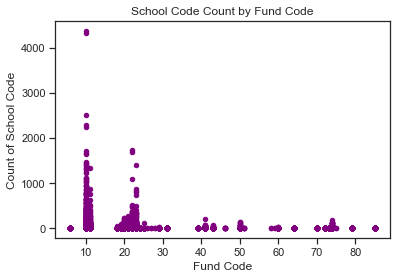

In [56]:
# Conduct a simple plot of the groupBy dataframe SCn_by_FCOSCAU too see fund_code by school_code
SCn_by_FCOSCAU.plot(x='fund_code', y='school_code', kind='scatter', color='purple')
plt.title('School Code Count by Fund Code')
plt.xlabel('Fund Code')
plt.ylabel('Count of School Code')
plt.savefig('SCn_by_FC.png')
plt.show()

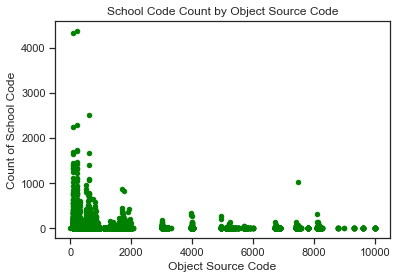

In [57]:
# Conduct a simple plot of the groupBy dataframe SCn_by_FCOSCAU too see object_source_code by school_code
SCn_by_FCOSCAU.plot(x='object_source_code', y='school_code', kind='scatter', color='green')
plt.title('School Code Count by Object Source Code')
plt.xlabel('Object Source Code')
plt.ylabel('Count of School Code')
plt.savefig('SCn_by_OSC.png')
plt.show()

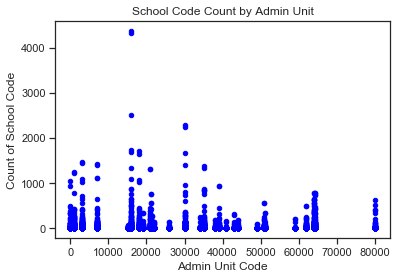

In [58]:
# Conduct a simple plot of the groupBy dataframe SCn_by_FCOSCAU too see admin_unit by school_code
SCn_by_FCOSCAU.plot(x='admin_unit', y='school_code', kind='scatter', color='blue')
plt.title('School Code Count by Admin Unit')
plt.xlabel('Admin Unit Code')
plt.ylabel('Count of School Code')
plt.savefig('SCn_by_AU.png')
plt.show()

### Side Note:

Something to consider why very little visualizations have been composed up to this point. We are dealing with highly categorical values and placing those values into an x and y graphs or graphical format is very limited since the numbers are not actual numbers, integers, or float values. In fact, all but one column is an identifier to a categorical value. Thus, causing me great complications to show more effective visualizations. The above groupBy data frame allowed me to conduct some basic visualizations for the time being. I promise more visualizations will follow as soon as I get a good representative data frame to support the purpose of this project.

### My Midway SUMMARY of FINDINGS:

It is evident that fund_code 10: General Funding is the most frequently used fund code. Object Source Code below 2000 is most used by school code count. While Admin Unit Code is spread out across school code count. Depending on the funding reasons, there are many anomalies and outliers to consider. Further Exploratory Data Analysis (EDA) needs to be conducted. While I have personally found some columns that may not necessarily provide vital information to the purpose of the project, I believe that I will not be able to get to the root cause of the project research questions without eliminating those columns of little value. <b>In particular to reaching some solid answers to complete this project, I have made the executive decision to omit <u>sre_code, job_class_code, and grant_code</u>.</b> Each of these columns contain values that do not pertain to why funding is spent but rather special circumstances within the Colorado K12 Financial Transparency data set. <b>I have also made the decision to omit any <u>zero</u> value codes as it doesn't feed into the project objectives.</b> This means dropping <b><u>program_code</u></b> due to its extensive use of the zero value.

Moving on, I will subset the necessary column values as I move forward.

In [59]:
COK12_df2.shape

(279115, 11)

In [60]:
COK12_df2.columns

Index(['district_code', 'admin_unit', 'school_code', 'fund_code',
       'location_code', 'sre_code', 'program_code', 'object_source_code',
       'job_class_code', 'grant_code', 'amount_cents'],
      dtype='object')

## <center>Further EDA</center>

### Notes to moving on with further EDA
Let's see if we can get around the complexities and subset only the pertinent columns. As I have noted previously, columns sre_code, job_class_code, grant_code, and program_code do NOT provide us relevent information on expenses or expenditures by school or district. This was our intiial goal. I could have dropped those columns, but I will subset for now in case I decide to bring them back into the data frame.

In [61]:
#Subset the district code, admin unit, school code, fund code, locaiton code, onject_source_code, and amount_cents
COK12_subset = COK12_df2[['district_code', 'admin_unit', 'school_code', 'fund_code', 'location_code', 'object_source_code', 'amount_cents']]

In [62]:
# Look at subset head
COK12_subset.head()

,district_code,admin_unit,school_code,fund_code,location_code,object_source_code,amount_cents
0,3080,64203,0,10,600,100,71250
1,3080,64203,0,10,600,100,13841274
2,3080,64203,0,10,700,100,12171639
3,3080,64203,0,21,700,100,4079700
4,3080,64203,4854,10,200,100,8660925


In [63]:
# Look at subset tail
COK12_subset.tail()

,district_code,admin_unit,school_code,fund_code,location_code,object_source_code,amount_cents
280681,1180,64233,570,10,300,810,340700
280682,1180,64233,429,11,951,810,-700
280683,1180,64233,429,11,951,810,45477
280684,1180,64233,429,11,951,810,24500
280685,1180,64233,429,11,951,810,2499


In [64]:
# Look at number of rows and columns
COK12_subset.shape

(279115, 7)

In [65]:
# Look at data frame summary data
COK12_subset_dfs = DataFrameSummary(COK12_subset)

In [66]:
# Look at the column stats within the Data Frame Summary
COK12_subset_dfs.columns_stats

,district_code,admin_unit,school_code,fund_code,location_code,object_source_code,amount_cents
counts,279115,279115,279115,279115,279115,279115,279115
uniques,200,62,1920,33,258,407,221831
missing,0,0,0,0,0,0,0
missing_perc,0%,0%,0%,0%,0%,0%,0%
types,numeric,numeric,numeric,numeric,numeric,numeric,numeric


In [67]:
# Convert the DataFrame Summary to image output
DataFrame_to_image(COK12_subset_dfs.columns_stats, css)

Loading page (1/2)
Rendering (2/2)                                                    
Done                                                               


### Nice image of the subset Data Frame Summary
![COK12_dfsSubset](Images/DFSoutSubset.png)

In [68]:
# Look at describe and compare to Data Frame Summary Statistics code we previously ran
COK12_SubDescribe = COK12_subset.describe()

In [69]:
# Let's try to get an image of the describe dataframe for comparison purposes to the DataFrameSummary above
DataFrame_to_image(COK12_SubDescribe, css)

Loading page (1/2)
Rendering (2/2)                                                    
Done                                                               


#### Again, very nice image of the subset Describe table
![COK12_SubDescribe](Images/DescribeoutSubset.png)

### From our data frame summary above, the column stats show 200 unique district_code values. Let's see take a peak at what values we are dealing with below: 

In [70]:
# Let's see how many unique district_code values are there:
DC_unique = np.unique(COK12_subset['district_code'])
DC_unique

array([  10,   20,   30,   40,   50,   60,   70,  100,  110,  120,  123,
        130,  140,  170,  180,  190,  220,  230,  240,  250,  260,  270,
        290,  310,  470,  480,  490,  500,  510,  520,  540,  550,  560,
        640,  740,  770,  860,  870,  880,  890,  900,  910,  920,  930,
        940,  950,  960,  970,  980,  990, 1000, 1010, 1020, 1030, 1040,
       1050, 1060, 1070, 1080, 1110, 1120, 1130, 1140, 1150, 1160, 1180,
       1195, 1220, 1330, 1340, 1350, 1360, 1380, 1390, 1400, 1410, 1420,
       1430, 1440, 1450, 1460, 1480, 1490, 1500, 1510, 1520, 1530, 1540,
       1550, 1560, 1570, 1580, 1590, 1600, 1620, 1750, 1760, 1780, 1790,
       1810, 1828, 1850, 1860, 1870, 1980, 1990, 2000, 2010, 2020, 2035,
       2055, 2070, 2180, 2190, 2395, 2405, 2505, 2515, 2520, 2530, 2535,
       2540, 2560, 2570, 2580, 2590, 2600, 2610, 2620, 2630, 2640, 2650,
       2660, 2670, 2680, 2690, 2700, 2710, 2720, 2730, 2740, 2750, 2760,
       2770, 2780, 2790, 2800, 2810, 2820, 2830, 28

In [71]:
# This is the count of values in district_code column
pd.value_counts(COK12_subset['district_code'].values,sort=True)

880     34928
1420    21123
900     15173
20      11183
1550    10620
        ...  
9140       71
9165       56
8042       42
8041       28
9120       22
Length: 200, dtype: int64

### The column stats show 62 unique admin_unit values in the data frame summary. Let's see take a peak at what values we are dealing with below: 

In [72]:
# Let's see how many unique admin_unit values are there:
AU_unique = np.unique(COK12_subset['admin_unit'])
AU_unique

array([    0,  1010,  1020,  1040,  1070,  3010,  3020,  3030,  3040,
        3060,  7010,  7020, 15010, 16010, 18010, 19010, 19205, 21020,
       21030, 21040, 21050, 21060, 21080, 21085, 21090, 21490, 22010,
       26011, 30011, 34010, 35010, 35020, 35030, 38010, 39031, 41010,
       43010, 44020, 49010, 51010, 51020, 59010, 62040, 62050, 62060,
       64043, 64053, 64093, 64103, 64123, 64133, 64143, 64153, 64160,
       64163, 64193, 64200, 64203, 64205, 64213, 64233, 80010],
      dtype=int64)

In [73]:
# This is the count of values in admin_unit column
pd.value_counts(COK12_subset['admin_unit'].values,sort=True)

16010    35040
30011    21123
18010    15173
1020     11183
35010    10620
         ...  
19205      774
41010      668
62050      650
35030      615
49010      590
Length: 62, dtype: int64

### The column stats show 1,920 unique school_code values in the data frame summary. It may not be feasable to show all 1,920 unique values in our machine learning algortihm, but let's see take a look at what values we are dealing with below: 

In [74]:
# Let's see how many unique school_code values are there:
SC_unique = np.unique(COK12_subset['school_code'])
SC_unique

array([   0,   10,   11, ..., 9805, 9808, 9809], dtype=int64)

In [75]:
#This is the count of values in school_code column
pd.value_counts(COK12_subset['school_code'].values,sort=True)

0       66878
24       1163
4516      771
20        695
1426      496
        ...  
2966        1
1455        1
4518        1
4520        1
6009        1
Length: 1920, dtype: int64

The unique school_code values will not bring meaningful information to the project goals as there are too much dimensionality in the school_code column. This will not be helpful in our machine learning methodology.

### The column stats show 33 unique fund_code values in the data frame summary. Let's see take a look at what values we are dealing with below:

In [76]:
# Let's see how many unique fund_code values are there:
FC_unique = np.unique(COK12_subset['fund_code'])
FC_unique

array([ 6, 10, 11, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 39,
       41, 43, 46, 50, 51, 58, 59, 60, 64, 70, 72, 73, 74, 75, 79, 85],
      dtype=int64)

In [77]:
# This is the count of values in fund_code column
pd.value_counts(COK12_subset['fund_code'].values,sort=True)

10    156838
22     31148
11     24780
21     19035
23     16804
20      7374
74      6389
41      3451
19      3344
43      2870
50      1999
31      1624
18       889
60       632
25       630
64       263
72       235
29       191
85       145
73       120
70        91
6         71
24        65
79        36
39        30
28        26
27        14
46         8
51         5
26         2
58         2
59         2
75         2
dtype: int64

#### fund_code Note:
Not bad output for the fund_code values. This should be taken into consideration when applying machine learning algorithms. The fund_code column seems to have the least dimensionality with only 34 unique values. This is an indicator that it may be possible and best to apply one-hot endocing to the fund_code column.

#### The column stats show 258 unique location_code values in the data frame summary. Let's see take a look at what values we are dealing with below: 

In [78]:
# Let's see how many unique location_code values are there:
LC_unique = np.unique(COK12_subset['location_code'])
LC_unique

array([  0, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111,
       112, 114, 115, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
       129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141,
       142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 154, 155, 156,
       158, 160, 163, 166, 167, 169, 170, 171, 172, 174, 175, 178, 180,
       181, 182, 184, 187, 188, 190, 193, 197, 198, 199, 200, 202, 205,
       207, 210, 215, 216, 219, 220, 221, 222, 230, 235, 240, 241, 244,
       250, 251, 254, 260, 262, 270, 280, 282, 283, 300, 301, 302, 304,
       305, 309, 310, 311, 312, 314, 318, 330, 331, 332, 340, 345, 350,
       351, 352, 354, 355, 360, 363, 370, 375, 380, 400, 408, 461, 462,
       477, 500, 501, 502, 503, 505, 509, 510, 513, 520, 526, 534, 552,
       600, 605, 606, 614, 615, 620, 623, 625, 630, 634, 635, 639, 640,
       645, 647, 650, 655, 660, 665, 670, 672, 673, 680, 685, 691, 699,
       700, 705, 710, 715, 720, 725, 730, 735, 740, 800, 900, 90

In [79]:
# This is the count of values in location_code column
pd.value_counts(COK12_subset['location_code'].values,sort=True)

100    79496
300    39963
600    35258
200    29514
0      21675
       ...  
182        2
104        2
134        2
623        2
983        1
Length: 258, dtype: int64

#### The column stats show 407 unique object_source_code values in the data frame summary. Let's see take a look at what values we are dealing with below: 

In [80]:
# Let's see how many unique object_source_code values are there:
OSC_unique = np.unique(COK12_subset['object_source_code'])
OSC_unique

array([   0,  100,  110,  111,  112,  120,  130,  140,  150,  160,  190,
        200,  210,  211,  215,  216,  221,  230,  250,  251,  252,  253,
        254,  290,  292,  300,  311,  312,  313,  314,  320,  330,  331,
        332,  334,  335,  339,  340,  341,  390,  400,  410,  411,  421,
        422,  430,  431,  432,  441,  442,  450,  490,  500,  510,  511,
        512,  513,  514,  515,  516,  519,  520,  521,  522,  523,  525,
        526,  528,  529,  530,  531,  532,  533,  534,  540,  550,  560,
        561,  562,  563,  564,  565,  566,  569,  572,  580,  581,  582,
        583,  590,  591,  592,  593,  594,  595,  596,  597,  600,  601,
        602,  605,  607,  610,  611,  612,  613,  614,  615,  616,  618,
        619,  621,  622,  623,  624,  626,  629,  630,  631,  632,  633,
        634,  635,  636,  640,  650,  690,  691,  700,  710,  719,  720,
        721,  722,  723,  730,  732,  734,  735,  740,  800,  810,  820,
        830,  831,  833,  840,  842,  850,  851,  8

In [81]:
# This is the count of values in object_source_code column
pd.value_counts(COK12_subset['object_source_code'].values,sort=True)

100     50875
200     50215
600     33490
500     11008
580     10824
        ...  
1174        1
840         1
842         1
1170        1
0           1
Length: 407, dtype: int64

In [82]:
#Let's sort the dataframe by amount_cents and see the highest values spent, again
ACsub_sort = COK12_subset.sort_values(by=['amount_cents'],ascending=False)
ACsub_sort.head()

,district_code,admin_unit,school_code,fund_code,location_code,object_source_code,amount_cents
5596,880,16010,0,10,800,7401,163314000000
24127,880,16010,0,41,800,7402,68971924543
19633,880,16010,0,10,800,1110,60470469058
24113,880,16010,0,22,800,7402,49427814056
5999,880,16010,0,41,800,8112,46900163720


In [83]:
#Let's see the amount_cents lowest values spent, again
ACsub_sort.tail()

,district_code,admin_unit,school_code,fund_code,location_code,object_source_code,amount_cents
19680,900,18010,0,10,0,7461,-16281827955
34448,880,16010,0,43,800,7401,-26237938031
24112,880,16010,0,22,800,7401,-49159538007
24126,880,16010,0,41,800,7401,-68611649475
5597,880,16010,0,10,800,7402,-161480000000


Nothing has changed from the previous data frame to this subset data frame. Therefore, the subset values changed very little or show little skew in the dataframe. Let's try a simple melt function for coding purposes....

In [84]:
# Try to melt function to identify each object source code by other financial code columns
longFCOSC = pd.melt(COK12_subset, 
    id_vars=['fund_code', 'object_source_code'],
    var_name='Account Code Elements', value_name='Unique ID')

In [85]:
# Look at melt head
longFCOSC.head()

,fund_code,object_source_code,Account Code Elements,Unique ID
0,10,100,district_code,3080
1,10,100,district_code,3080
2,10,100,district_code,3080
3,21,100,district_code,3080
4,10,100,district_code,3080


In [86]:
# Look at melt tail
longFCOSC.tail()

,fund_code,object_source_code,Account Code Elements,Unique ID
1395570,10,810,amount_cents,340700
1395571,11,810,amount_cents,-700
1395572,11,810,amount_cents,45477
1395573,11,810,amount_cents,24500
1395574,11,810,amount_cents,2499


In [87]:
# Let's get a count on fund_code values in the longFCOSC data frame
FC_count = pd.value_counts(longFCOSC['fund_code'].values,sort=True)
FC_count.head()

10    784190
22    155740
11    123900
21     95175
23     84020
dtype: int64

In [88]:
# Let's get a count on object_source_code values in the longFCOSC data frame
OCS_count = pd.value_counts(longFCOSC['object_source_code'].values,sort=True)
OCS_count.head()

100    254375
200    251075
600    167450
500     55040
580     54120
dtype: int64

Once again, the melt data frame shows little variation from the COK12_df2 data frame prior to the subset. Let's try to create some basic visualizations to see correlations.

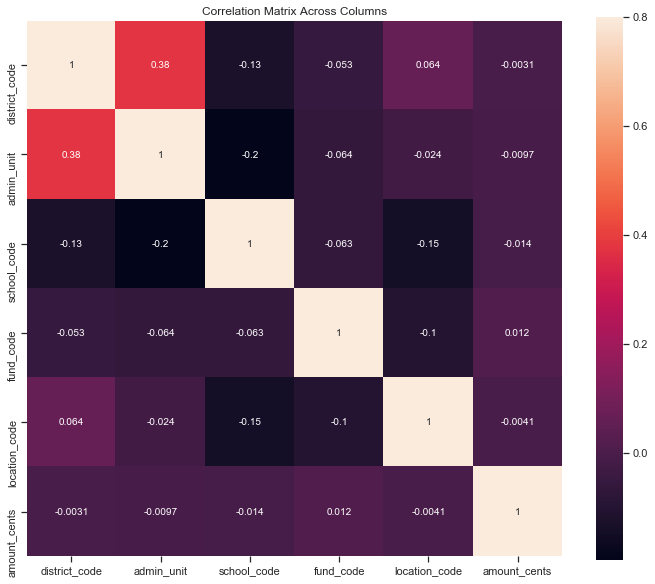

In [200]:
#Let's try a correlation matrix of the subset data frame
corrmat = COK12_subset.corr()
f, ax = plt.subplots(figsize=(12,10)) #setting some parameters of the plot to help readability
sns.heatmap(corrmat, vmax = .8, square=True, annot=True)
plt.title('Correlation Matrix Across Columns')
plt.savefig('COK12_corr.png', dpi=300, bbox_inches='tight')

### Correlations by Columns in Subset Data frame

The top 5 highest correlations:
* district_code and admin_unit show a correlation of 0.66.
* fund_code and object_source_code show a correlation of 0.23.
* district_code and location_code show a correlation of 0.17.
* admin_unit and object_source_code show a correlation of 0.14.

The top 5 lowest correlations:
* program_code and object_source_code show a correlation of -0.35.
* school_code and object_source_code show a correlation of -0.19.
* school_code and location_code show a correlation of -0.15.
* admin_unit and scool_code including fund_code and location_code show a correlation os -0.1.

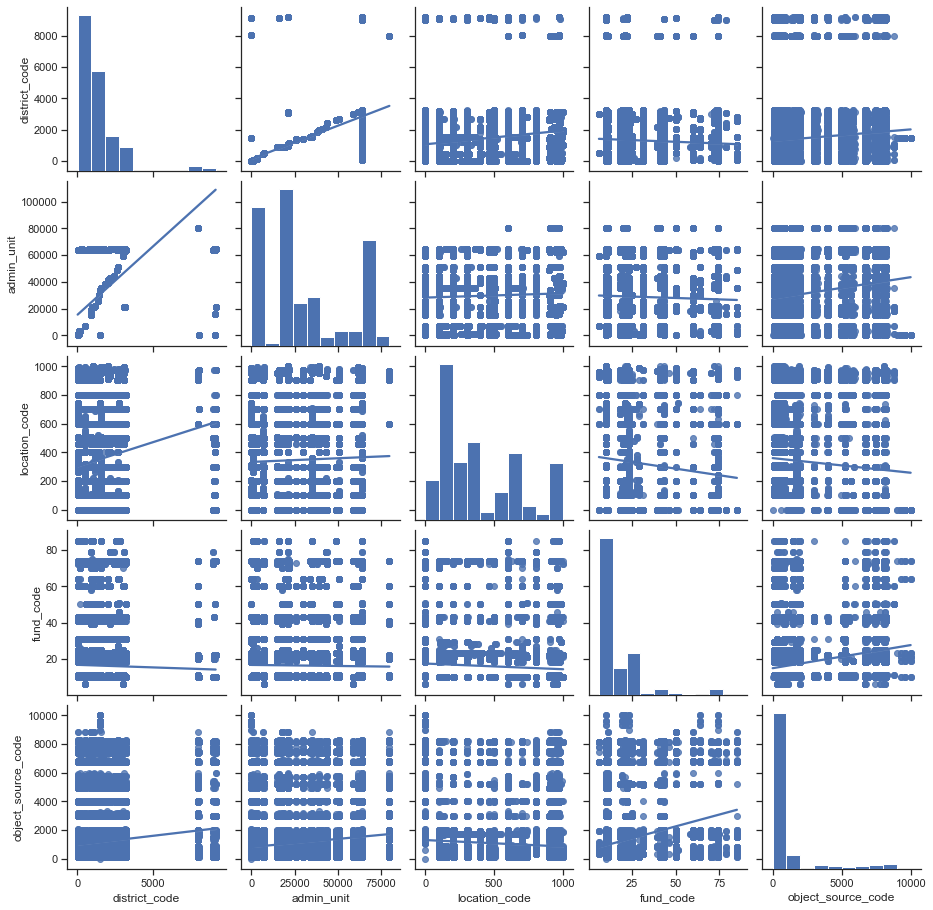

In [205]:
# Let's take a look at a pairplot of the highest correlated columns
cols = ['district_code', 'admin_unit', 'location_code', 'fund_code', 'object_source_code']
sns.pairplot(COK12_df2[cols], height = 2.5, kind='reg')
plt.savefig('COK12_pp.png', dpi=300, bbox_inches='tight')
plt.show()

## <center>LOAD FFP Chart of Accounts for 2016-2017 to merge with the data:</center>

Here we will load the Chart of Accounts excel document to give detail to the Colorado K-12 Financial Transparency data set. This way we can idenfity codes based on the definition of there values within the Chart of Accounts archive data. This can be found at the folllowing reference and website link.

Reference:
<br>
Colorado Department of Education. (2019, June 13). Chart of Accounts: Archive. Copyright © 1999-2020 Colorado Department of Education. Retrieved from http://www.cde.state.co.us/cdefinance/sfcoa_archive

In [90]:
# Load the Financial Policies and Procedures Chart of Accounts 2016-2017 into a dataframe but by District Code sheet
COA1617_DC = pd.read_excel('Data/Chart of Accounts_1617.xlsx', sheet_name='District Code', header=0)

In [91]:
# Look at upload head
COA1617_DC.head()

,District,Description,Detailed Description,
0,10,MAPLETON 1,MAPLETON 1,NaN
1,20,ADAMS 12 FIVE STAR SCHOOLS,ADAMS 12 FIVE STAR SCHOOLS,NaN
2,30,ADAMS COUNTY 14,ADAMS COUNTY 14,NaN
3,40,SCHOOL DISTRICT 27J,SCHOOL DISTRICT 27J,NaN
4,50,BENNETT 29J,BENNETT 29J,NaN


In [92]:
# Look at upload tail
COA1617_DC.tail()

,District,Description,Detailed Description,
196,9165,UTE PASS BOCES,UTE PASS BOCES,NaN
197,9170,COLORADO DIGITAL BOCES,COLORADO DIGITAL BOCES,NaN
198,8001,CHARTER SCHOOL INSTITUTE,CHARTER SCHOOL INSTITUTE,NaN
199,9000,Colorado School for the Deaf and Blind,Colorado School for the Deaf and Blind,NaN
200,9999,FOR DISTRICT WIDE SCHOOL (9980),FOR DISTRICT WIDE SCHOOL (9980),NaN


In [93]:
# Subset data frame to rid unnecessary extra columns
COA1617_DCsubset = COA1617_DC[['District', 'Description']]

In [94]:
# Check head
COA1617_DCsubset.head()

,District,Description
0,10,MAPLETON 1
1,20,ADAMS 12 FIVE STAR SCHOOLS
2,30,ADAMS COUNTY 14
3,40,SCHOOL DISTRICT 27J
4,50,BENNETT 29J


In [95]:
# Rename the column to district_code
COA1617_DCsubset = COA1617_DCsubset.rename(columns = {'District':'district_code', 'Description':'district'})

In [96]:
# Check head and column rename
COA1617_DCsubset.head()

,district_code,district
0,10,MAPLETON 1
1,20,ADAMS 12 FIVE STAR SCHOOLS
2,30,ADAMS COUNTY 14
3,40,SCHOOL DISTRICT 27J
4,50,BENNETT 29J


In [97]:
# Check original subset dataframe -REMOVE later!
COK12_subset.head()

,district_code,admin_unit,school_code,fund_code,location_code,object_source_code,amount_cents
0,3080,64203,0,10,600,100,71250
1,3080,64203,0,10,600,100,13841274
2,3080,64203,0,10,700,100,12171639
3,3080,64203,0,21,700,100,4079700
4,3080,64203,4854,10,200,100,8660925


In [98]:
# Merge District Code Description with COK12_subset data frame
COK12_subset = COK12_subset.merge(COA1617_DCsubset, on = 'district_code')

In [99]:
# Check head to ensure merge on district code was accomplished
COK12_subset.head()

,district_code,admin_unit,school_code,fund_code,location_code,object_source_code,amount_cents,district
0,3080,64203,0,10,600,100,71250,WELD COUNTY RE-1
1,3080,64203,0,10,600,100,13841274,WELD COUNTY RE-1
2,3080,64203,0,10,700,100,12171639,WELD COUNTY RE-1
3,3080,64203,0,21,700,100,4079700,WELD COUNTY RE-1
4,3080,64203,4854,10,200,100,8660925,WELD COUNTY RE-1


In [100]:
# Load the Financial Policies and Procedures Chart of Accounts 2016-2017 into a dataframe but by Admin Unit sheet
COA1617_AU = pd.read_excel('Data/Chart of Accounts_1617.xlsx', sheet_name='Admin Code', header=0)

In [101]:
# Look at upload head
COA1617_AU.head()

,Administrative Unit,Description,Detailed Description
0,1010,"Adams 1, Mapleton","Adams 1, Mapleton"
1,1020,"Adams 12, Northglenn-Thornton","Adams 12, Northglenn-Thornton"
2,1030,"Adams 14, Commerce City","Adams 14, Commerce City"
3,1040,"Adams 27J, Brighton","Adams 27J, Brighton"
4,1070,"Adams 50, Westminster","Adams 50, Westminster"


In [102]:
# Look at upload tail
COA1617_AU.tail()

,Administrative Unit,Description,Detailed Description
136,64153,San Luis Valley BOCS,San Luis Valley BOCS
137,64153,"Alamosa Re-11J, Alamosa","Alamosa Re-11J, Alamosa"
138,64153,"Alamosa Re-22 J, Sangre de Cristo","Alamosa Re-22 J, Sangre de Cristo"
139,64153,"Conejos RE1J, North Conejos (La Jara)","Conejos RE1J, North Conejos (La Jara)"
140,64153,"Conejos 6J, Sanford","Conejos 6J, Sanford"


In [103]:
# Subset data frame to rid unnecessary extra columns
COA1617_AUsubset = COA1617_AU[['Administrative Unit', 'Description']]

In [104]:
# Check subset head
COA1617_AUsubset.head()

,Administrative Unit,Description
0,1010,"Adams 1, Mapleton"
1,1020,"Adams 12, Northglenn-Thornton"
2,1030,"Adams 14, Commerce City"
3,1040,"Adams 27J, Brighton"
4,1070,"Adams 50, Westminster"


In [105]:
# Rename the column to admin_code
COA1617_AUsubset = COA1617_AUsubset.rename(columns = {'Administrative Unit':'admin_unit', 'Description':'admin_desc'})

In [106]:
# Check head and column rename
COA1617_AUsubset.head()

,admin_unit,admin_desc
0,1010,"Adams 1, Mapleton"
1,1020,"Adams 12, Northglenn-Thornton"
2,1030,"Adams 14, Commerce City"
3,1040,"Adams 27J, Brighton"
4,1070,"Adams 50, Westminster"


In [107]:
# Check original subset dataframe + DC_desc -REMOVE later!
COK12_subset.head()

,district_code,admin_unit,school_code,fund_code,location_code,object_source_code,amount_cents,district
0,3080,64203,0,10,600,100,71250,WELD COUNTY RE-1
1,3080,64203,0,10,600,100,13841274,WELD COUNTY RE-1
2,3080,64203,0,10,700,100,12171639,WELD COUNTY RE-1
3,3080,64203,0,21,700,100,4079700,WELD COUNTY RE-1
4,3080,64203,4854,10,200,100,8660925,WELD COUNTY RE-1


In [108]:
# Merge admin_unit Code Description with COK12_subset data frame
COK12_subset = COK12_subset.merge(COA1617_AUsubset, on = 'admin_unit')

In [109]:
# Check head to ensure merge on admin unit was accomplished
COK12_subset.head()

,district_code,admin_unit,school_code,fund_code,location_code,object_source_code,amount_cents,district,admin_desc
0,3080,64203,0,10,600,100,71250,WELD COUNTY RE-1,Centennial BOCES
1,3080,64203,0,10,600,100,71250,WELD COUNTY RE-1,"Morgan Re-2 (J), Brush"
2,3080,64203,0,10,600,100,71250,WELD COUNTY RE-1,"Morgan Re-20 (J), Weldon Valley"
3,3080,64203,0,10,600,100,71250,WELD COUNTY RE-1,"Morgan Re-50 (J), Wiggins"
4,3080,64203,0,10,600,100,71250,WELD COUNTY RE-1,"Weld Re-1, Gilcrest"


In [110]:
# Load the Financial Policies and Procedures Chart of Accounts 2016-2017 into a dataframe but by FUND sheet
COA1617_FC = pd.read_excel('Data/Chart of Accounts_1617.xlsx', sheet_name='FUND', header=0)

In [111]:
# Look at upload head
COA1617_FC.head()

,Fund,Description,Detailed Description,
0,10.0,General Fund,Used to account for and report all financial r...,
1,11.0,Charter School Fund.,Used to track revenues and expenditures of cha...,
2,18.0,Risk-Management \nSub-Fund Of The General Fund,"(optional). If used, this fund allows you to ...",
3,19.0,Colorado Preschool Program \nSub-Fund Of The G...,"If used, this fund allows a district to separa...",
4,6.0,"Supplemental Capital Construction, Technology,...",(special revenue) The revenue from a tax levi...,


In [112]:
# Look at upload tail
COA1617_FC.tail()

,Fund,Description,Detailed Description,
1048567,NaN,NaN,NaN,
1048568,NaN,NaN,NaN,
1048569,NaN,NaN,NaN,
1048570,NaN,NaN,NaN,
1048571,NaN,NaN,NaN,


In [113]:
# Subset data frame to rid unnecessary extra columns
COA1617_FCsubset = COA1617_FC[['Fund', 'Description']]

In [114]:
# Check head
COA1617_FCsubset.head()

,Fund,Description
0,10.0,General Fund
1,11.0,Charter School Fund.
2,18.0,Risk-Management \nSub-Fund Of The General Fund
3,19.0,Colorado Preschool Program \nSub-Fund Of The G...
4,6.0,"Supplemental Capital Construction, Technology,..."


In [115]:
# Rename the column to fund_code
COA1617_FCsubset = COA1617_FCsubset.rename(columns = {'Fund':'fund_code', 'Description':'fund_desc'})

In [116]:
# Check head and column rename
COA1617_FCsubset.head()

,fund_code,fund_desc
0,10.0,General Fund
1,11.0,Charter School Fund.
2,18.0,Risk-Management \nSub-Fund Of The General Fund
3,19.0,Colorado Preschool Program \nSub-Fund Of The G...
4,6.0,"Supplemental Capital Construction, Technology,..."


In [117]:
# Check original subset dataframe + DC_desc + AU_desc -REMOVE later!
COK12_subset.head()

,district_code,admin_unit,school_code,fund_code,location_code,object_source_code,amount_cents,district,admin_desc
0,3080,64203,0,10,600,100,71250,WELD COUNTY RE-1,Centennial BOCES
1,3080,64203,0,10,600,100,71250,WELD COUNTY RE-1,"Morgan Re-2 (J), Brush"
2,3080,64203,0,10,600,100,71250,WELD COUNTY RE-1,"Morgan Re-20 (J), Weldon Valley"
3,3080,64203,0,10,600,100,71250,WELD COUNTY RE-1,"Morgan Re-50 (J), Wiggins"
4,3080,64203,0,10,600,100,71250,WELD COUNTY RE-1,"Weld Re-1, Gilcrest"


In [118]:
# Merge District Code Description with COK12_subset data frame
COK12_subset = COK12_subset.merge(COA1617_FCsubset, on = 'fund_code')

In [119]:
# Check head to ensure merge on fund desc was accomplished
COK12_subset.head()

,district_code,admin_unit,school_code,fund_code,location_code,object_source_code,amount_cents,district,admin_desc,fund_desc
0,3080,64203,0,10,600,100,71250,WELD COUNTY RE-1,Centennial BOCES,General Fund
1,3080,64203,0,10,600,100,71250,WELD COUNTY RE-1,"Morgan Re-2 (J), Brush",General Fund
2,3080,64203,0,10,600,100,71250,WELD COUNTY RE-1,"Morgan Re-20 (J), Weldon Valley",General Fund
3,3080,64203,0,10,600,100,71250,WELD COUNTY RE-1,"Morgan Re-50 (J), Wiggins",General Fund
4,3080,64203,0,10,600,100,71250,WELD COUNTY RE-1,"Weld Re-1, Gilcrest",General Fund


#### Notice how the object_source_code field is less than four digits. It does not contain the leading 0 for the 3 digit numbers as the Chart of Accounts suggests. We will need to add the leading 0, if the object source code is a 3 digit number in order to merge dataframes.

In [120]:
# Change object_source_code to string to be able to add the leading 0
COK12_subset = COK12_subset.astype({'object_source_code':'str'})

In [121]:
# Check data type change
COK12_subset.dtypes

district_code          int64
admin_unit             int64
school_code            int64
fund_code              int64
location_code          int64
object_source_code    object
amount_cents           int64
district              object
admin_desc            object
fund_desc             object
dtype: object

In [122]:
# Add the leading zero to object_source_code
COK12_subset['object_source_code'] = COK12_subset['object_source_code'].apply(lambda x: x.zfill(4))

In [123]:
# Check head to see if leading zero was added to object_source_code
COK12_subset.head()

,district_code,admin_unit,school_code,fund_code,location_code,object_source_code,amount_cents,district,admin_desc,fund_desc
0,3080,64203,0,10,600,0100,71250,WELD COUNTY RE-1,Centennial BOCES,General Fund
1,3080,64203,0,10,600,0100,71250,WELD COUNTY RE-1,"Morgan Re-2 (J), Brush",General Fund
2,3080,64203,0,10,600,0100,71250,WELD COUNTY RE-1,"Morgan Re-20 (J), Weldon Valley",General Fund
3,3080,64203,0,10,600,0100,71250,WELD COUNTY RE-1,"Morgan Re-50 (J), Wiggins",General Fund
4,3080,64203,0,10,600,0100,71250,WELD COUNTY RE-1,"Weld Re-1, Gilcrest",General Fund


In [124]:
# Check tail and look at object_source_code
COK12_subset.tail()

,district_code,admin_unit,school_code,fund_code,location_code,object_source_code,amount_cents,district,admin_desc,fund_desc
601743,2180,43010,0,39,800,0830,7469086,MONTROSE COUNTY RE-1J,"Montrose Re-1J, Montrose",Certificates of Participation (COP) Debt Servi...
601744,2180,43010,0,39,0,5210,127800000,MONTROSE COUNTY RE-1J,"Montrose Re-1J, Montrose",Certificates of Participation (COP) Debt Servi...
601745,2180,43010,0,39,0,6750,14231287,MONTROSE COUNTY RE-1J,"Montrose Re-1J, Montrose",Certificates of Participation (COP) Debt Servi...
601746,2180,43010,0,39,0,7402,16647117,MONTROSE COUNTY RE-1J,"Montrose Re-1J, Montrose",Certificates of Participation (COP) Debt Servi...
601747,2180,43010,0,39,0,8101,30878404,MONTROSE COUNTY RE-1J,"Montrose Re-1J, Montrose",Certificates of Participation (COP) Debt Servi...


In [125]:
# Load the Financial Policies and Procedures Chart of Accounts 2016-2017 into a dataframe but by Object_Source sheet
COA1617_OSC = pd.read_excel('Data/Chart of Accounts_1617.xlsx', sheet_name='Object_Source', header=0)

In [126]:
# Look at upload head
COA1617_OSC.head()

,Object/Source,Description,Detailed Description
0,0100,Salaries,Amounts paid for personal services to both per...
1,0110,Salaries of Regular Employees,"Full-time, part-time, and prorated portions of..."
2,0120,Salaries of Temporary Employees,"Full-time, part-time, and prorated portions of..."
3,0130,Salaries for Overtime,Amounts paid to employees of the school distri...
4,0140,Salaries for Leave,Amounts paid by the school district to employe...


In [127]:
# Look at upload tail
COA1617_OSC.tail()

,Object/Source,Description,Detailed Description
418,8234,Accumulated Depreciation on Works of Art and H...,Accumulated Depreciation on Works of Art and H...
419,8241,Machinery and equipment,Machinery and equipment
420,8242,Accumulated depreciation on machinery and equi...,Accumulated depreciation on machinery and equi...
421,8251,Construction in progress,Construction in progress
422,8800,Deferred outflows of resources,For the reporting of the consumption of net as...


In [128]:
# Subset data frame to rid unnecessary extra columns
COA1617_OSCsubset = COA1617_OSC[['Object/Source', 'Description']]

In [129]:
# Check head
COA1617_OSCsubset.head()

,Object/Source,Description
0,0100,Salaries
1,0110,Salaries of Regular Employees
2,0120,Salaries of Temporary Employees
3,0130,Salaries for Overtime
4,0140,Salaries for Leave


In [130]:
# Rename the column to object_source_code
COA1617_OSCsubset = COA1617_OSCsubset.rename(columns = {'Object/Source':'object_source_code', 'Description':'object_source_desc'})

In [131]:
# Check head and column rename
COA1617_OSCsubset.head()

,object_source_code,object_source_desc
0,0100,Salaries
1,0110,Salaries of Regular Employees
2,0120,Salaries of Temporary Employees
3,0130,Salaries for Overtime
4,0140,Salaries for Leave


In [132]:
# Check original subset dataframe + DC_desc + AU_desc + fund -REMOVE later!
COK12_subset.head()

,district_code,admin_unit,school_code,fund_code,location_code,object_source_code,amount_cents,district,admin_desc,fund_desc
0,3080,64203,0,10,600,0100,71250,WELD COUNTY RE-1,Centennial BOCES,General Fund
1,3080,64203,0,10,600,0100,71250,WELD COUNTY RE-1,"Morgan Re-2 (J), Brush",General Fund
2,3080,64203,0,10,600,0100,71250,WELD COUNTY RE-1,"Morgan Re-20 (J), Weldon Valley",General Fund
3,3080,64203,0,10,600,0100,71250,WELD COUNTY RE-1,"Morgan Re-50 (J), Wiggins",General Fund
4,3080,64203,0,10,600,0100,71250,WELD COUNTY RE-1,"Weld Re-1, Gilcrest",General Fund


In [133]:
# Merge Object Source Code Description with COK12_subset data frame
COK12_subset = COK12_subset.merge(COA1617_OSCsubset, on = 'object_source_code')

In [134]:
# Check head to ensure merge on object_source_code desc was accomplished
COK12_subset.head()

,district_code,admin_unit,school_code,fund_code,location_code,object_source_code,amount_cents,district,admin_desc,fund_desc,object_source_desc
0,3080,64203,0,10,600,0100,71250,WELD COUNTY RE-1,Centennial BOCES,General Fund,Salaries
1,3080,64203,0,10,600,0100,71250,WELD COUNTY RE-1,"Morgan Re-2 (J), Brush",General Fund,Salaries
2,3080,64203,0,10,600,0100,71250,WELD COUNTY RE-1,"Morgan Re-20 (J), Weldon Valley",General Fund,Salaries
3,3080,64203,0,10,600,0100,71250,WELD COUNTY RE-1,"Morgan Re-50 (J), Wiggins",General Fund,Salaries
4,3080,64203,0,10,600,0100,71250,WELD COUNTY RE-1,"Weld Re-1, Gilcrest",General Fund,Salaries


In [135]:
# Load the Financial Policies and Procedures Chart of Accounts 2016-2017 into a dataframe but by Location sheet
COA1617_LC = pd.read_excel('Data/Chart of Accounts_1617.xlsx', sheet_name='Location', header=0, nrows=16)

In [136]:
# Look at upload head
COA1617_LC.head()# Look at upload tail

,Location,Description,Detailed Description,
0,100 - 199,Elementary Schools,Normally classified as elementary instruction ...,
1,200 - 299,Middle (Junior High) Schools,Normally falls between an elementary school an...,
2,300 - 399,Senior High Schools,Comprises any span of grades beginning with th...,
3,400 - 460\n470 - 499,Vocational/Technical Schools,Used to designate secondary schools which are ...,
4,461 - 469,On-Line Activity,Used to designate where on line activity is ta...,


In [137]:
# Look at upload tail
COA1617_LC.tail()

,Location,Description,Detailed Description,
11,930 - 939,High School Charter Schools,Must be used for high school charter schools.,
12,940 - 949,Vocational/Technical Charter Schools,Must be used for vocational/technical charter ...,
13,950 - 969,Combination Charter Schools,Location codes 950 through 969 must be used fo...,
14,970 - 989,Other Operational Units,Location codes 970 through 989 are available f...,
15,990 - 990,Private/Parochial Schools,Used to identify private or parochial schools....,


In [138]:
COA1617_LC.shape

(16, 4)

In [139]:
# Subset data frame to rid unnecessary extra columns
COA1617_LCsubset = COA1617_LC[['Location', 'Description']]

In [140]:
# Check head
COA1617_LCsubset.head()

,Location,Description
0,100 - 199,Elementary Schools
1,200 - 299,Middle (Junior High) Schools
2,300 - 399,Senior High Schools
3,400 - 460\n470 - 499,Vocational/Technical Schools
4,461 - 469,On-Line Activity


In [141]:
# Rename the column to district_code
COA1617_LCsubset = COA1617_LCsubset.rename(columns = {'Location':'location_code', 'Description':'location_desc'})

In [142]:
# Check head and column rename
COA1617_LCsubset.head()

,location_code,location_desc
0,100 - 199,Elementary Schools
1,200 - 299,Middle (Junior High) Schools
2,300 - 399,Senior High Schools
3,400 - 460\n470 - 499,Vocational/Technical Schools
4,461 - 469,On-Line Activity


In [143]:
COA1617_LCsubset.dtypes

location_code    object
location_desc    object
dtype: object

In [144]:
# Look at the location_code values...
COA1617_LCsubset

,location_code,location_desc
0,100 - 199,Elementary Schools
1,200 - 299,Middle (Junior High) Schools
2,300 - 399,Senior High Schools
3,400 - 460\n470 - 499,Vocational/Technical Schools
4,461 - 469,On-Line Activity
5,500 - 599,Combination Schools
6,600 - 699,Centralized Services
7,700 - 799,Service Centers
8,800 - 899,District-wide Costs
9,900 - 919,Elementary Charter Schools


#### Location Code findings
Further investigation will need to be done to deal with the 100-199, 200-299, 300-299, 400-460, 470-499, 461-469, 500-599, 600-699, 700-799, 800-899, 900-919, 920-929, 930-939, 940-949, 950-959, 960-969, 970-979, 980-989, 990-990 values!!!

Unfortionately I am defeated by the location_code column within the Financial Policies and Procedures Chart of Accounts 2016-2017. Seems like it was a poor decision for them to create the excel spreadsheet in this matter. 

In [145]:
# Look at the dataframe head
COK12_subset.head()

,district_code,admin_unit,school_code,fund_code,location_code,object_source_code,amount_cents,district,admin_desc,fund_desc,object_source_desc
0,3080,64203,0,10,600,0100,71250,WELD COUNTY RE-1,Centennial BOCES,General Fund,Salaries
1,3080,64203,0,10,600,0100,71250,WELD COUNTY RE-1,"Morgan Re-2 (J), Brush",General Fund,Salaries
2,3080,64203,0,10,600,0100,71250,WELD COUNTY RE-1,"Morgan Re-20 (J), Weldon Valley",General Fund,Salaries
3,3080,64203,0,10,600,0100,71250,WELD COUNTY RE-1,"Morgan Re-50 (J), Wiggins",General Fund,Salaries
4,3080,64203,0,10,600,0100,71250,WELD COUNTY RE-1,"Weld Re-1, Gilcrest",General Fund,Salaries


In [146]:
# Get columns
COK12_subset.columns

Index(['district_code', 'admin_unit', 'school_code', 'fund_code',
       'location_code', 'object_source_code', 'amount_cents', 'district',
       'admin_desc', 'fund_desc', 'object_source_desc'],
      dtype='object')

In [147]:
# Move columns in DataFrame to desired order
COK12_subset = COK12_subset[['district_code','district', 'admin_unit','admin_desc','school_code','fund_code','fund_desc', 'location_code', 'object_source_code', 'object_source_desc', 'amount_cents']]

In [148]:
# Ensure the data types are correct for the moment being...
COK12_subset.dtypes

district_code          int64
district              object
admin_unit             int64
admin_desc            object
school_code            int64
fund_code              int64
fund_desc             object
location_code          int64
object_source_code    object
object_source_desc    object
amount_cents           int64
dtype: object

Thanks to Professor Nathan George, he provided a helpful function to convert the column amount_cents to string and then back to float with the decimal in the correct place for the last 2 digits as the cents part of the currency value. I made a minor adjustment to the function and requested the return to contain the '.' (decimal) peice of the currency value. 

In [149]:
# Function to convert integer to string, add decimal, and convert bck to float. (Courtesy of Professor George)

def convert_to_decimal(number):
    # convert number to string
    num_str = str(number)

    # take everything but the last two digits as the integer part of the number
    int_part = num_str[:-2]
    
    # take the last 2 digits as the decimal places
    dec_part = num_str[-2:]
    
    return int_part + '.' + dec_part

In [150]:
# Let's make a copy of the dataframe again just in case things go wrong
COK12_df3 = COK12_subset.copy()

In [151]:
# Add decimal to amount_cents column values
COK12_df3['amount_cents'] = COK12_df3['amount_cents'].apply(convert_to_decimal)

In [152]:
# Check head to confirm decimal in amount_cents column
COK12_df3.head()

,district_code,district,admin_unit,admin_desc,school_code,fund_code,fund_desc,location_code,object_source_code,object_source_desc,amount_cents
0,3080,WELD COUNTY RE-1,64203,Centennial BOCES,0,10,General Fund,600,0100,Salaries,712.50
1,3080,WELD COUNTY RE-1,64203,"Morgan Re-2 (J), Brush",0,10,General Fund,600,0100,Salaries,712.50
2,3080,WELD COUNTY RE-1,64203,"Morgan Re-20 (J), Weldon Valley",0,10,General Fund,600,0100,Salaries,712.50
3,3080,WELD COUNTY RE-1,64203,"Morgan Re-50 (J), Wiggins",0,10,General Fund,600,0100,Salaries,712.50
4,3080,WELD COUNTY RE-1,64203,"Weld Re-1, Gilcrest",0,10,General Fund,600,0100,Salaries,712.50


In [153]:
# Look at data types again....
COK12_df3.dtypes

district_code          int64
district              object
admin_unit             int64
admin_desc            object
school_code            int64
fund_code              int64
fund_desc             object
location_code          int64
object_source_code    object
object_source_desc    object
amount_cents          object
dtype: object

In [154]:
# Look at entire amount_cents type again
type(COK12_df3['amount_cents'])

pandas.core.series.Series

### Note that although the column values are "number" values and showing as type integer, the numbers are unique ids for categorical data. Therefore, we should change the type of those columns except the <u>amount_cents</u> column to the dtype "category" not int64.

In [155]:
# Convert columns to categorical types
COK12_df3 = COK12_df3.astype({
    'district_code':'category',
    'admin_unit': 'category',
    'school_code':'category',
    'fund_code':'category',
    'location_code':'category',
    'object_source_code':'category',
})

In [156]:
# Check data types of columns now
COK12_df3.dtypes

district_code         category
district                object
admin_unit            category
admin_desc              object
school_code           category
fund_code             category
fund_desc               object
location_code         category
object_source_code    category
object_source_desc      object
amount_cents            object
dtype: object

#### At least, we have a couple strong and reliable dataframes to move forwrd. Let's begin some visualizations.... 

## <center>Colorado K-12 Financial Transparency Visualizations</center>

In [179]:
# Import libraries
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
# sns.set(style="ticks", color_codes=True)

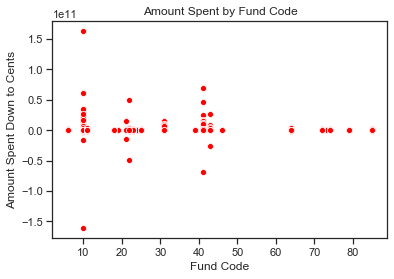

In [216]:
# Let's plot Funds to amount_cents spent
sns.scatterplot(x='fund_code', y='amount_cents', data=COK12_subset, color='red')
plt.title('Amount Spent by Fund Code')
plt.xlabel('Fund Code')
plt.ylabel('Amount Spent Down to Cents')
plt.savefig('COK12_FCAC.png', dpi=300, bbox_inches='tight')
plt.show()

#### As we can see, Fund Code 10 (General Funds) and Fund Code 41 (Building Fund) is a frequently used Fund Code. It also shows that the highest and lowest Amount Cents Spent values for Fund Code 10 has a large disparity both positively and negatively. Hence, my prior concern on outliers and anomalies.

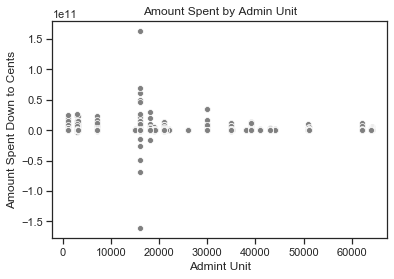

In [217]:
# Let's plot Admin Unit to amount_cents spent
sns.scatterplot(x='admin_unit', y='amount_cents', data=COK12_subset, color='grey')
plt.title('Amount Spent by Admin Unit')
plt.xlabel('Admint Unit')
plt.ylabel('Amount Spent Down to Cents')
plt.savefig('COK12_AUAC.png', dpi=300, bbox_inches='tight')
plt.show()

#### As we can see, the Admin Unit codes between 10000-20000 shows a commonly used Admin Unit code; as well as the disparity between positive and negative values on the Amount Cents spent. Again, this is another concern on outliers and anomalies.

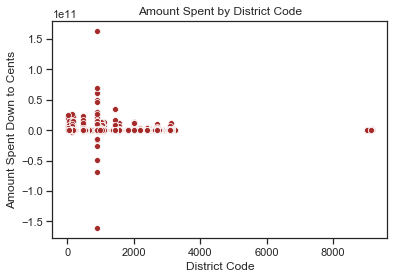

In [221]:
# Let's plot District Codeto amount_cents spent
sns.scatterplot(x='district_code', y='amount_cents', data=COK12_subset, color='brown')
plt.title('Amount Spent by District Code')
plt.xlabel('District Code')
plt.ylabel('Amount Spent Down to Cents')
plt.savefig('COK12_DCAC.png', dpi=300, bbox_inches='tight')
plt.show()

#### District codes between 0-2000 show a commonly used District code along with the disparity between positive and negative values on the Amount Cents spent. This is just another concern on outliers and anomalies.

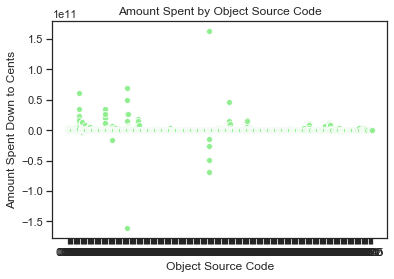

In [220]:
# Let's plot Object Source Code to amount_cents spent
sns.scatterplot(x='object_source_code', y='amount_cents', data=COK12_subset, color='lightgreen')
plt.title('Amount Spent by Object Source Code')
plt.xlabel('Object Source Code')
plt.ylabel('Amount Spent Down to Cents')
plt.savefig('COK12_OSCAC.png', dpi=300, bbox_inches='tight')
plt.show()

#### It is a bit difficult to see which exact Object Source Code is an outlier to the overall Object Source Codes. However, we can see that there are a few single points at the positive and negative points at the left of the graph and in the middle.

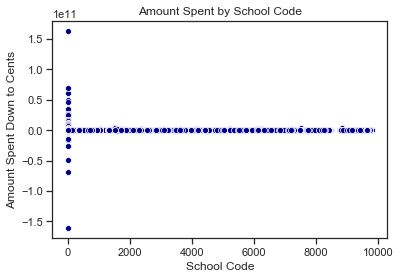

In [224]:
# Let's plot School Code to amount_cents spent
sns.scatterplot(x='school_code', y='amount_cents', data=COK12_subset, color='darkblue')
plt.title('Amount Spent by School Code')
plt.xlabel('School Code')
plt.ylabel('Amount Spent Down to Cents')
plt.savefig('COK12_SCAC.png', dpi=300, bbox_inches='tight')
plt.show()

#### Again, it is evident that School Code zero "0" is a commonly used value and there are points at the positive and negative areas of the graph.

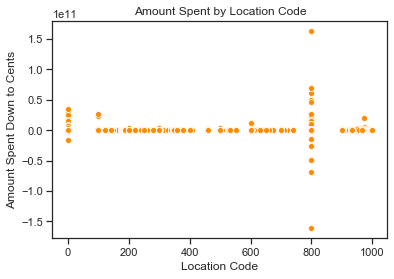

In [228]:
# Let's plot Location Code to amount_cents spent
sns.scatterplot(x='location_code', y='amount_cents', data=COK12_subset, color='darkorange')
plt.title('Amount Spent by Location Code')
plt.xlabel('Location Code')
plt.ylabel('Amount Spent Down to Cents')
plt.savefig('COK12_LCAC.png', dpi=300, bbox_inches='tight')
plt.show()

#### Once, again, it is evident that Location Code "800" is a commonly used value and there are points at the positive and negative areas of the graph.

#### Let's see what other visualizations we can create based on the constraints of the high categorical values in our data set.

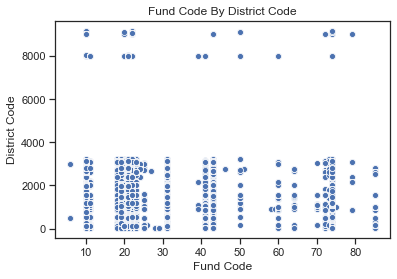

In [229]:
# Let's take a look at a scatter plot of the fund_code and distrct_code
sns.scatterplot(x='fund_code', y='district_code', data=COK12_df2)
plt.title('Fund Code By District Code')
plt.xlabel('Fund Code')
plt.ylabel('District Code')
plt.savefig('COK12_FCDC.png', dpi=300, bbox_inches='tight')
plt.show()

#### There is an interesting split between the scatter points on the District Codes roughly around 3000-7000 amongst the Fund Codes.

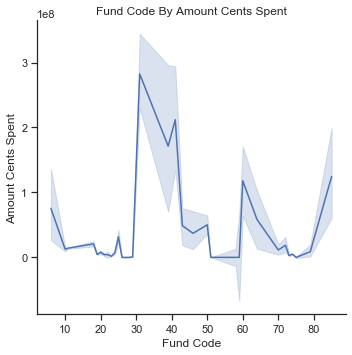

In [231]:
# Let's look at a line plot of fund code and amount_cents spent for comparison purposes
sns.relplot(x='fund_code', y='amount_cents', kind='line', data=COK12_df2)
plt.title('Fund Code By Amount Cents Spent')
plt.xlabel('Fund Code')
plt.ylabel('Amount Cents Spent')
plt.savefig('COK12_FCACline.png', dpi=300, bbox_inches='tight')
plt.show()

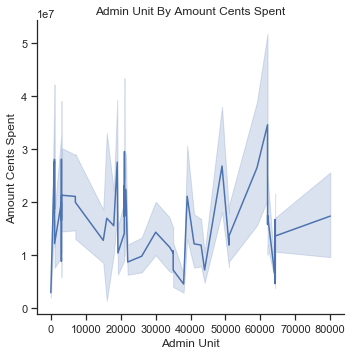

In [232]:
# Let's look at a line plot of admin unit and amount_cents spent for comparison purposes
sns.relplot(x='admin_unit', y='amount_cents', kind='line', data=COK12_df2)
plt.title('Admin Unit By Amount Cents Spent')
plt.xlabel('Admin Unit')
plt.ylabel('Amount Cents Spent')
plt.savefig('COK12_AUACline.png', dpi=300, bbox_inches='tight')
plt.show()

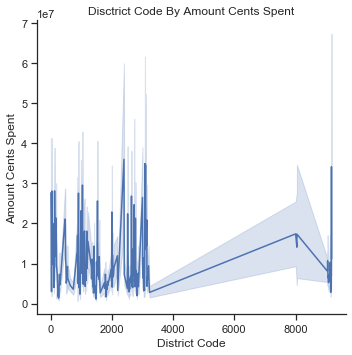

In [233]:
# Let's look at a line plot of disctirct code and amount_cents spent for comparison purposes
sns.relplot(x='district_code', y='amount_cents', kind='line', data=COK12_df2)
plt.title('Disctrict Code By Amount Cents Spent')
plt.xlabel('District Code')
plt.ylabel('Amount Cents Spent')
plt.savefig('COK12_DCACline.png', dpi=300, bbox_inches='tight')
plt.show()

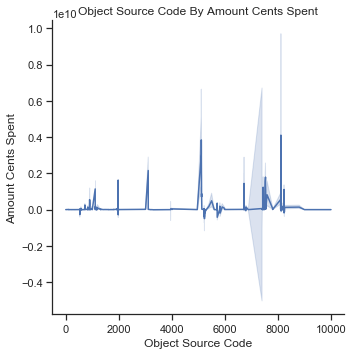

In [234]:
## Let's look at a line plot of Object Source code and amount_cents spent for comparison purposes
sns.relplot(x='object_source_code', y='amount_cents', kind='line', data=COK12_df2)
plt.title('Object Source Code By Amount Cents Spent')
plt.xlabel('Object Source Code')
plt.ylabel('Amount Cents Spent')
plt.savefig('COK12_OSCACline.png', dpi=300, bbox_inches='tight')
plt.show()

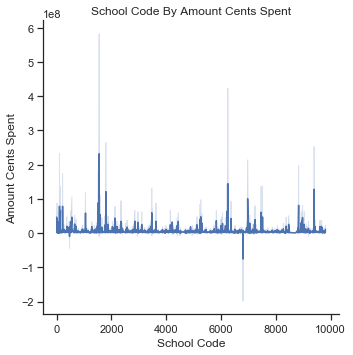

In [235]:
# Let's look at a line plot of School code and amount_cents spent for comparison purposes
sns.relplot(x='school_code', y='amount_cents', kind='line', data=COK12_df2)
plt.title('School Code By Amount Cents Spent')
plt.xlabel('School Code')
plt.ylabel('Amount Cents Spent')
plt.savefig('COK12_SCCACline.png', dpi=300, bbox_inches='tight')
plt.show()

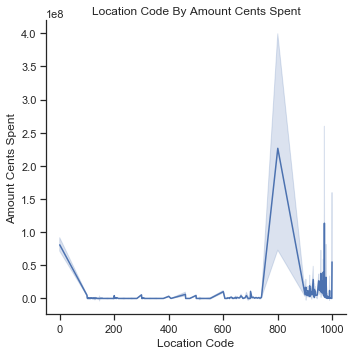

In [237]:
# Let's look at a line plot of Location code and amount_cents spent for comparison purposes
sns.relplot(x='location_code', y='amount_cents', kind='line', data=COK12_df2)
plt.title('Location Code By Amount Cents Spent')
plt.xlabel('Location Code')
plt.ylabel('Amount Cents Spent')
plt.savefig('COK12_LCACline.png', dpi=300, bbox_inches='tight')
plt.show()

#### Very interesting visual findings. For fun, let's create some categorical seaborn plots as our data set contains a high amount of categorical values. I wonder what we can see and learn from such purposes...

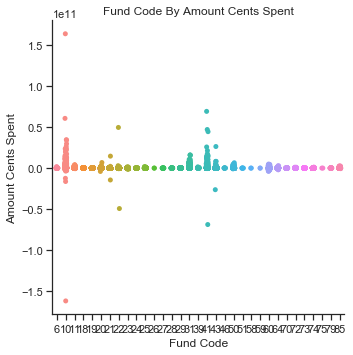

In [241]:
# Strip plot of Fund Code and Amount Cents
sns.catplot(x='fund_code', y='amount_cents', kind='strip', data=COK12_df2)
plt.title('Fund Code By Amount Cents Spent')
plt.xlabel('Fund Code')
plt.ylabel('Amount Cents Spent')
plt.savefig('COK12_FCACstrip.png', dpi=300, bbox_inches='tight')
plt.show()

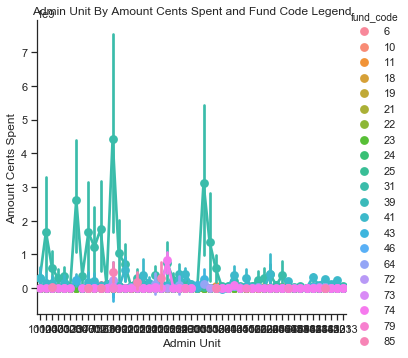

In [242]:
# Point Plot of Admin Unit and Mount Cents with Fund Code as the color legend
sns.catplot(x='admin_unit', y='amount_cents', kind='point', data=COK12_subset, hue='fund_code')
plt.title('Admin Unit By Amount Cents Spent and Fund Code Legend')
plt.xlabel('Admin Unit')
plt.ylabel('Amount Cents Spent')
plt.savefig('COK12_AUACFCpoint.png', dpi=300, bbox_inches='tight')
plt.show()

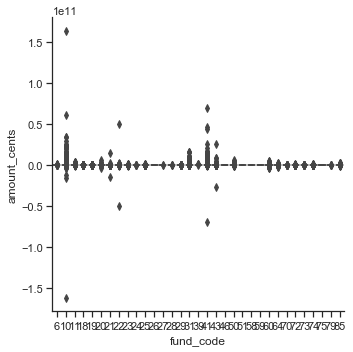

In [243]:
# Boxplot on Fund COde and Amount Cents...
sns.catplot(x='fund_code', y='amount_cents', kind='box', data=COK12_df2)

#### Not very helpful but we can see the difficulties of dealing with categorical data...

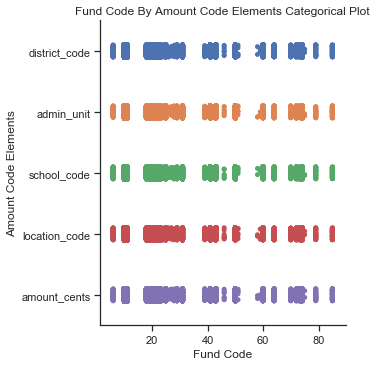

In [244]:
# Basic categorical plot on the melt long Fund Code and Object Source Code dataframe
sns.catplot(x="fund_code", y="Account Code Elements", data=longFCOSC)
plt.title('Fund Code By Amount Code Elements Categorical Plot')
plt.xlabel('Fund Code')
plt.ylabel('Amount Code Elements')
plt.savefig('COK12_FCACEpoint.png', dpi=300, bbox_inches='tight')
plt.show()

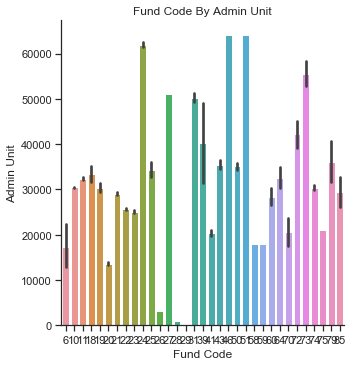

In [245]:
# Basic categorical bar plot on Fund Code and Admin Unit
sns.catplot(x="fund_code", y="admin_unit", kind="bar", data=COK12_df2)
plt.title('Fund Code By Admin Unit')
plt.xlabel('Fund Code')
plt.ylabel('Admin Unit')
plt.savefig('COK12_FCAUbar.png', dpi=300, bbox_inches='tight')
plt.show()

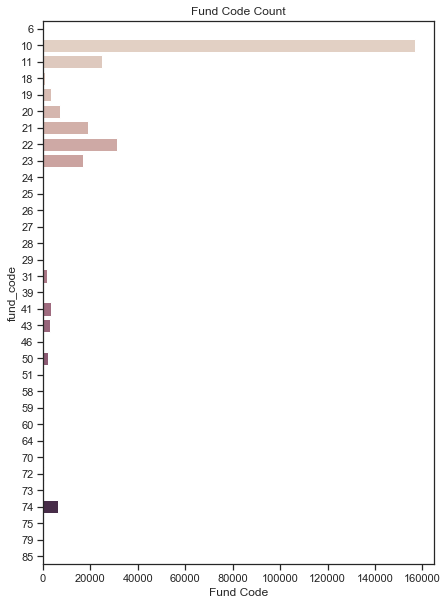

In [247]:
# Let's take a basic bar plot on Fund Code Count
f, ax = plt.subplots(figsize=(7, 10))
sns.countplot(y="fund_code", data=COK12_df2, color="c", palette="ch:.15")
plt.title('Fund Code Count')
plt.xlabel('Fund Code')
plt.savefig('COK12_FCcount.png', dpi=300, bbox_inches='tight')
plt.show()

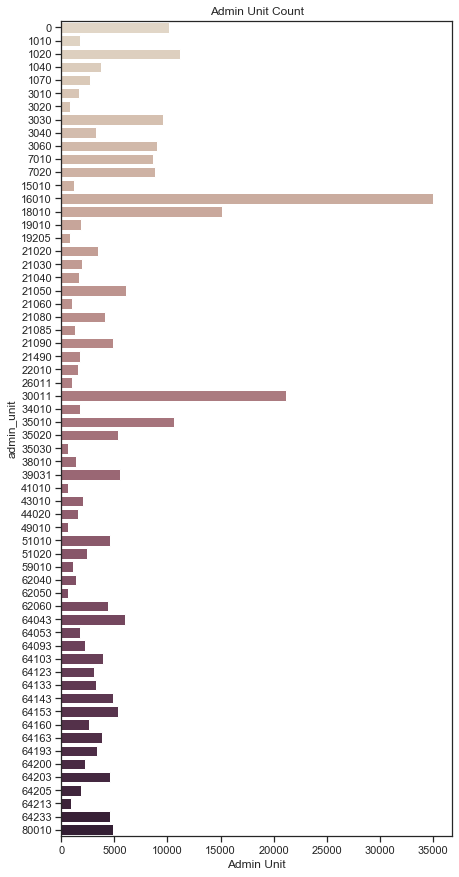

In [248]:
# Let's take a basic bar plot on Fund Code Count
f, ax = plt.subplots(figsize=(7, 15))
sns.countplot(y="admin_unit", data=COK12_df2, color="c", palette="ch:.25")
plt.title('Admin Unit Count')
plt.xlabel('Admin Unit')
plt.savefig('COK12_AUcount.png', dpi=300, bbox_inches='tight')
plt.show()

## <center>Machine Learning Algorithms: Kmeans and KNN Comparison</center>

# STOPPED copy of code into notepad here!!!!

In [ ]:
# To Do:
# Research code to add decimal to amount_cents into dollar type or dollar value.
# Research more on how best to aggregate and group relevent data.
# Begin adding visualizations based on the relevant financial data to present.
# Begin first phases of KNN and DBSCAN

In [ ]:
# Testing out locale and babel for working with currency

In [62]:
import locale

In [63]:
from babel.numbers import format_currency

In [64]:
COK12_df2.head()

,district_code,admin_unit,school_code,fund_code,location_code,sre_code,program_code,object_source_code,job_class_code,grant_code,amount_cents
0,3080,64203,0,10,600,0,20,100,200,0,71250
1,3080,64203,0,10,600,0,10,100,200,4010,13841274
2,3080,64203,0,10,700,0,2700,100,100,0,12171639
3,3080,64203,0,21,700,0,3100,100,100,0,4079700
4,3080,64203,4854,10,200,0,1700,100,400,3130,8660925


In [65]:
COK12_df2.dtypes

district_code         int64
admin_unit            int64
school_code           int64
fund_code             int64
location_code         int64
sre_code              int64
program_code          int64
object_source_code    int64
job_class_code        int64
grant_code            int64
amount_cents          int64
dtype: object

In [66]:
# Try PrettyPandas
# source: https://prettypandas.readthedocs.io/en/latest/quickstart.html
from prettypandas import PrettyPandas

In [67]:
# Attempt using pretty pandas currency attribute
COK12_df3 = PrettyPandas(COK12_df2).as_currency(subset='amount_cents', currency=u'USD', locale=('en_US')) # Format just amount_cents column

In [68]:
# Check head of data frame
COK12_df3.head()

AttributeError: 'PrettyPandas' object has no attribute 'head'

In [69]:
# Take a look at Pretty Pandas type, Is it actually a data frame?
type(COK12_df3)

prettypandas.summarizer.PrettyPandas

### Why is the amount_cents column not converting to currency??

### End of attempt machine learning algorithm in Jupyter Notebook!

# <center>Summary of FoodData Central Data Science Practicum I Project</center>

### Original Goal: How are financial expenditures are being spent across K through 12 schools in Colorado?
<br>

### <u><b>What Objective's did I meet?</b></u>
<br>
In looking back at the Research Questions, did I come to some answers?<br>
<br>
* <b>What are the school expenses that impact our children’s educational needs? </b><br>
Answer goes here.<br>
<br>
* <b>How are Colorado K-12 expenses being spent?</b><br>
Answer goes here.<br>
<br>
* <b>Who are our overall schools impacted by the primary expenses and expenditures being spent?</b><br>
Answer goes here.<br>


### <u><b>Primary Question in this project:</b></u> 
<br>
* <b>Is there true transparency within this dataset from the Colorado K-12, BOCES, and Colorado Department of Education?<br> What really is transparent to us, our families, our children, our students, and future role models of society?</b>
<br>
In fact, did we really succeed at our project goals? Or are we in fact left with more questions and uncertainty? We learned very little information on fundraisers and how they feed into our schools. We learned there is funding of some sort, very little funding is spread out amongst a variety of needs, and most of it is seems to be going to salaries and administrative duties that are currently put at a halt due to the coronavirus. Should we be questioning the financial transparency, state funding into education? Or should we agree to end this project on a positive note that there is more to be done, more research and a lot more expenses and funding to bring to light. I am left with so many questions that only fuel my burning need of knowledge on the disparity of information and true financial transparency on Colorado K-12 education.<br>
<br>
We looked at a number of visualizations and more than enough of my EDA markdown to write a research report. We compared my findings. I attempted to apply two Machine Learning Algorithms: Kmeans and Knn. However, with our challenges on the high categorical values, both machine learning algorithms proved challenging and a near unsuccess.
<br>


## <u><b>What did I learn? What challenges did I encounter?</b></u>
<br>
•	I continue to learn and will always learn that exploratory data analysis takes a great amount of time to synthesize.<br>
•	Categorical data can be a big pain and heart wrenching circumstance. ( I think I cried about 3 times.)<br>
•	I learned to understand complex data, you have to imerse yourself into studying every detail of the financial codes. This is not easy and is very complex. You have to become a subject matter expert in financial material you will question and may never really understand..<br>
•	I also learned to really embrace the wisdom of K.I.S.S; keep it simple stupid!<br>
•	In final, I learned you may not get the answers you had hoped for and you may find yourself with more questions than what you began with. Thus, learning and future research is necessary.<br>
•	Last but not least, I learned financing, accounting, and codes related to expenses is not my forte. It is what it is.<br>

### <u><b>Conclusion</b></u>
This project and the data within this project began as an interesting aspect of my daily life and the current situation of events in our life with the coronavirus. I learned being a stay-at-home mom, 24 hours a day, 7 days a week; with no vacation or time to be alone even when showering without some child knocking on the door is very very challenging. Especially with the coronavirus situation, I became a teacher to two children who were remote learning, sharing my computer for all our schoolwork, and zoom sessions. Exhausting the Wi-Fi and internet connection to meet all our electronic needs for my children and myself, was something new and a lesson learned quickly to expand the internet speed. Let us just say our internet bill became a lot more expensive and so did our other utilities that were essential to get by our daily electronic needs.

Getting back on subject, I understand Colorado K-12 financial expenses can be beyond my project expectations. I have gained a lot of respect for the time, patience, and concentration it takes for teachers to teach our children. On the other hand, I question how financial transparency is really transparent. especially in these circumstances of closed school, jobless administrative staff, remote teachers, on-site overhead costs for operations such as electricity, water, or building operations have come to a halt. So where are the financial expenditures going and do salary and pay still occur normally? Should we question such matters. In no bitter way am I targeting anything, I am only curious as I am challenged with my own teaching, parenting, and time management skills during this time. Overall, again I can respect the difficulties schools, teachers, and administrative deal with during the school year. I, too, worked in higher education and have always been a firm and avid believer of education. The thing is, when do we question public schooling and those that we lack in our system pertaining to the drop of high school graduates and student education rates? When do we question if our schools are failing our students or us? When do we ask for real financial transparency that tells us exactly what our schools are spending and how are our student education benefiting or being impacted by such financial ramifications? 

It may have not resulted in a huge accomplishment, but I would like to think it brings to light there is a need for more clearer transparency in the financial aspect of our Colorado K-12 schools. Do we all need to be a high risk and high needs school to be given some funding from the state? Do we all have to consider other forms of schooling whether private, Montessori, religious, or paid education to get the funding needed for our students, the future? These are questions we are left with and have little answers but to continue to research and investigate the needs of our students and future school needs.<br>
<br>
<b>So, where do we go from here?</b>
<br>
We continue on to be more conscientious of our children, students, and our future leaders’ educations. We can pray that things work in their best efforts and put out faith into a system that has been around for histories. We can continue to ask questions, research, and try to find meaning, answers, and understandings to our questions, concerns, and worries. All in all, we must put faith in our teachers and schools. We must trust the education of our students will be met based on those with a passion to teach our children and not for the financial purpose of it. We must trust our schools fund raisers really do benefit the schools financially. We must do our best to support those fund raisers the best we can whether 4 or more times a year. Though, we must know that as our best effort, we can only do so much. Learning to fuel our children’s education in other ways not financially but through donations and other efforts can be another area of interest. To end on a good note, we must put the most trust and faith in our children, students, and future leaders to embrace the circumstances of their current situation and learn as best as they can. This is entirely my own opinion so it should be taken lightly and not as a form of influence.

### <u><b>References and Sources</b></u>